# Multi Membership Data with Outliers

In [26]:
from RTKM import *
from ClusteringMethods import *
from AccuracyMeasures import *

import numpy as np
import pandas as pd
import csv
from sklearn.decomposition import PCA
from scipy.io import arff


In [27]:
data = arff.loadarff('datasets/yeast/yeast-train.arff')
df = pd.DataFrame(data[0])
array = df.to_numpy()
data = np.array(array[:, :-14], dtype = float)
labels = np.array(array[:, -14:], dtype = float)

Add ~10% noise to the dataset

In [3]:
# Create 10% noise
n,m = data.shape
num_out = 150
k=14

avg_feat_vals = np.average(data, axis = 0)
std_feat_vals = np.std(data, axis =0)

outlier_dat = np.zeros((num_out,103))

for i in range(num_out):
    outlier_dat[i,:] = avg_feat_vals + np.random.rand(103)*3*std_feat_vals
    
data_out = np.vstack((data, outlier_dat))


label_col = np.zeros((n+num_out,1))
label_col[-num_out:] = 1

labels_out = np.vstack((labels, np.zeros((num_out,k))) )

labels_out = np.hstack((labels_out, label_col))

#indices of true outliers
true_out = np.arange(1500,1650)

In [28]:
##### Data for latest figures ####
data = np.load('yeast_noise_data/Data_out.npy')
true_labels = np.load('yeast_noise_data/labels_out.npy')

true_out = np.arange(1500,1650)

In [29]:
data = data.T

Text(0.5, 1.0, 'Yeast Dataset Visualized Against Top 2 Principle Components')

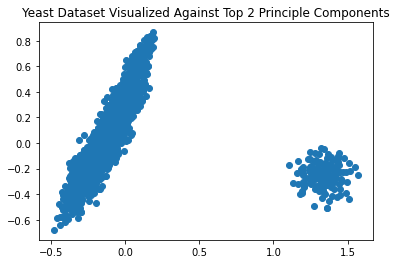

In [30]:
pca = PCA(n_components=3)
pca.fit(data.T)
Xnew = pca.transform(data.T)
Xnew = Xnew.T

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.title('Yeast Dataset Visualized Against Top 2 Principle Components')



# Run RTKM

Iteration 100
PALM reached maximum number of iterations


 Number of true positives:  [208, 322, 326, 203, 169, 163, 114, 140, 0, 20, 69, 432, 444, 0, 150] 

 Number of false positives :  [328, 310, 287, 153, 268, 375, 440, 489, 0, 335, 423, 121, 188, 0, 17] 

 Number of true negatives:  [846, 695, 765, 965, 941, 897, 949, 872, 1552, 1154, 1029, 401, 346, 1629, 1483] 

 Number of false negatives:  [268, 323, 272, 329, 272, 215, 147, 149, 98, 141, 129, 696, 672, 21, 0] 

 F1 scores for each cluster:  [0.41106719 0.50430697 0.53839802 0.45720721 0.38496583 0.3558952
 0.2797546  0.30501089 0.         0.07751938 0.2        0.51397977
 0.50800915 0.         0.94637224] 

 Average F1 score:  0.36549909718527585 

 me score: 0.011333333333333334


Text(0.5, 1.0, 'Robust Trimmed k Means')

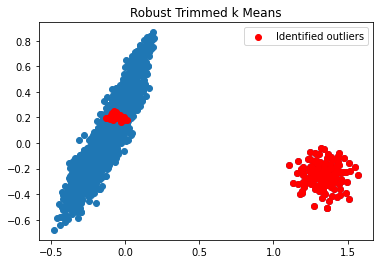

In [7]:
RTKM_yeast = RTKM(data)
RTKM_yeast.perform_clustering(k=14, percent_outliers = 0.10, max_iter = 100, num_members = 4) 
pred_clusters, pred_outliers = RTKM_yeast.return_clusters()

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels.T, pred_clusters = RTKM_yeast.weights, pred_outliers = RTKM_yeast.outliers, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c = 'r', label = 'Identified outliers')
# plt.scatter(RTKM_yeast.centers[0,:], RTKM_yeast.centers[1,:], c = 'b', label = 'Calculated Centers')
plt.legend()
plt.title('Robust Trimmed k Means')
#plt.savefig('MyMethodTrimmed')


# Run KMOR



 Number of true positives:  [62, 67, 76, 68, 82, 50, 29, 34, 12, 7, 6, 77, 75, 0, 0] 

 Number of false positives :  [45, 28, 58, 73, 12, 66, 54, 86, 93, 44, 87, 16, 28, 150, 165] 

 Number of true negatives:  [1129, 977, 994, 1045, 1197, 1206, 1335, 1275, 1459, 1445, 1365, 506, 506, 1479, 1335] 

 Number of false negatives:  [414, 578, 522, 464, 359, 328, 232, 255, 86, 154, 192, 1051, 1041, 21, 150] 

 F1 scores for each cluster:  [0.21269297 0.18108108 0.20765027 0.20208024 0.30654206 0.20242915
 0.16860465 0.16625917 0.1182266  0.06603774 0.04123711 0.12612613
 0.12305168 0.         0.        ] 

 Average F1 score:  0.14146792288430646 

 me score: 1.0060318086422517


Text(0.5, 1.0, 'KMOR')

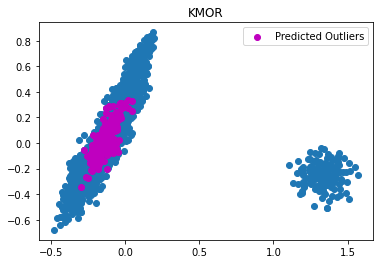

In [32]:
pred_labels_KMOR, pred_outliers_KMOR = run_kmor(data, k=14, percent_outliers= 0.10, gamma = 1)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels.T, pred_clusters = pred_labels_KMOR, pred_outliers = pred_outliers_KMOR, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

pred_outliers = np.where(pred_outliers_KMOR == 0)[0]
plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c= 'm', label= 'Predicted Outliers')
plt.legend()
plt.title('KMOR')




# Run NEO

    _pyeval at line 57 column 30

***** iteration: 1, objective: 6143.273052
***** iteration: 2, objective: 5877.576905
***** iteration: 3, objective: 5802.705105
***** iteration: 4, objective: 5758.906293
***** iteration: 5, objective: 5731.766996
***** iteration: 6, objective: 5717.227377
***** iteration: 7, objective: 5712.203249
***** iteration: 8, objective: 5710.647539
***** iteration: 9, objective: 5709.732333
***** iteration: 10, objective: 5709.195594
***** iteration: 11, objective: 5708.861117
***** iteration: 12, objective: 5708.640517
***** iteration: 13, objective: 5708.486362
***** iteration: 14, objective: 5708.383442
***** iteration: 15, objective: 5708.297450
***** iteration: 16, objective: 5708.167843
***** iteration: 17, objective: 5708.027979
***** iteration: 18, objective: 5707.842110
***** iteration: 19, objective: 5707.617412
***** iteration: 20, objective: 5707.313180
***** iteration: 21, objective: 5707.020053
***** iteration: 22, objective: 5706.535428
***** i

Text(0.5, 1.0, 'NEO-k-means')

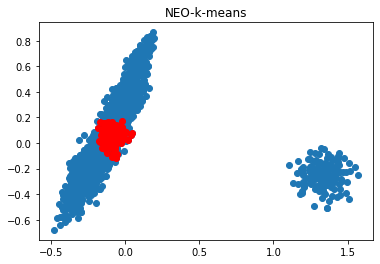

In [34]:
pred_labels_NEO, pred_outliers_NEO = run_neo(data, path_to_neo='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m'
        , k=14, percent_outliers=.10, sigma = 3, init_centers = None)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels.T, pred_clusters = pred_labels_NEO, pred_outliers = pred_outliers_NEO, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

outliers = np.where(pred_outliers_NEO == 0)

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,outliers], Xnew[1,outliers], c= 'r')
plt.title('NEO-k-means')



In [26]:
alpha_vals = np.linspace(0, .20, 11) 

f1_avg_rtkm, f1_avg_kmor, f1_avg_neo, me_avg_rtkm, me_avg_kmor, me_avg_neo, \
min_rtkm, max_rtkm, min_kmor, max_kmor, min_neo, max_neo = sensitivity_to_alpha(data, k=14, kmor_gamma= 1, 
                                                                                neo_sigma = 3, path_to_neo='/Users/olgadorabiala/Documents/ThesisResearch/PALM/neo_k_means_vector/neo_kmeans/neo_kmeans.m',
                                                                                alpha_vals= alpha_vals, iterations= 10, true_clusters=true_labels.astype(int).T,
                                                                                membership_option= 'multi', rtkm_sigma = 4)
    
    

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations


/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6185.186343
***** iteration: 2, objective: 6029.741013
***** iteration: 3, objective: 6003.515918
***** iteration: 4, objective: 5988.999840
***** iteration: 5, objective: 5980.167071
***** iteration: 6, objective: 5974.175533
***** iteration: 7, objective: 5970.237482
***** iteration: 8, objective: 5966.411709
***** iteration: 9, objective: 5963.133407
***** iteration: 10, objective: 5961.352629
***** iteration: 11, objective: 5960.189066
***** iteration: 12, objective: 5959.393366
***** iteration: 13, objective: 5958.932550
***** iteration: 14, objective: 5958.639527
***** iteration: 15, objective: 5958.405243
***** iteration: 16, objective: 5958.227016
***** iteration: 17, objective: 5958.144382
***** iteration: 18, objective: 5958.115290
***** iteration: 19, objective: 5958.073454
***** iteration: 20, objective: 5958.053850
***** iteration: 21, objective: 5958.047932
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6140.460606
***** iteration: 2, objective: 5978.159216
***** iteration: 3, objective: 5952.398813
***** iteration: 4, objective: 5937.698778
***** iteration: 5, objective: 5928.884714
***** iteration: 6, objective: 5923.062595
***** iteration: 7, objective: 5919.788824
***** iteration: 8, objective: 5918.163370
***** iteration: 9, objective: 5916.988948
***** iteration: 10, objective: 5915.704561
***** iteration: 11, objective: 5914.257642
***** iteration: 12, objective: 5912.942813
***** iteration: 13, objective: 5912.288206
***** iteration: 14, objective: 5911.791203
***** iteration: 15, objective: 5911.555376
***** iteration: 16, objective: 5911.377124
***** iteration: 17, objective: 5911.267346
***** iteration: 18, objective: 5911.177545
***** iteration: 19, objective: 5911.130641
***** iteration: 20, objective: 5911.104297
***** iteration: 21, objective: 5911.093062
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 32 column 9

***** iteration: 1, objective: 6173.446778
***** iteration: 2, objective: 6029.803868
***** iteration: 3, objective: 6004.291890
***** iteration: 4, objective: 5988.754314
***** iteration: 5, objective: 5979.030084
***** iteration: 6, objective: 5972.363865
***** iteration: 7, objective: 5968.146240
***** iteration: 8, objective: 5965.882150
***** iteration: 9, objective: 5963.935573
***** iteration: 10, objective: 5962.055477
***** iteration: 11, objective: 5960.325004
***** iteration: 12, objective: 5959.452190
***** iteration: 13, objective: 5959.000651
***** iteration: 14, objective: 5958.658365
***** iteration: 15, objective: 5958.391475
***** iteration: 16, objective: 5958.224427
***** iteration: 17, objective: 5958.091953
***** iteration: 18, objective: 5958.035988
***** iteration: 19, objective: 5958.000920
***** iteration: 20, objective: 5957.974849
***** iteration: 21, objective: 5957.961961
***** iteration: 22, objective: 5957.939692
***** it

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6182.489030
***** iteration: 2, objective: 6027.689888
***** iteration: 3, objective: 6002.851241
***** iteration: 4, objective: 5987.288792
***** iteration: 5, objective: 5977.499970
***** iteration: 6, objective: 5971.058260
***** iteration: 7, objective: 5967.484801
***** iteration: 8, objective: 5965.343109
***** iteration: 9, objective: 5963.514638
***** iteration: 10, objective: 5961.435157
***** iteration: 11, objective: 5959.977010
***** iteration: 12, objective: 5959.286891
***** iteration: 13, objective: 5958.850249
***** iteration: 14, objective: 5958.486243
***** iteration: 15, objective: 5958.290923
***** iteration: 16, objective: 5958.176055
***** iteration: 17, objective: 5958.110312
***** iteration: 18, objective: 5958.069670
***** iteration: 19, objective: 5958.047588
***** iteration: 20, objective: 5958.031623
***** iteration: 21, objective: 5958.013343
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6128.230777
***** iteration: 2, objective: 5971.021611
***** iteration: 3, objective: 5950.116968
***** iteration: 4, objective: 5938.480174
***** iteration: 5, objective: 5930.924861
***** iteration: 6, objective: 5925.240068
***** iteration: 7, objective: 5920.805774
***** iteration: 8, objective: 5917.836904
***** iteration: 9, objective: 5915.843136
***** iteration: 10, objective: 5914.321353
***** iteration: 11, objective: 5912.999101
***** iteration: 12, objective: 5912.347295
***** iteration: 13, objective: 5911.928762
***** iteration: 14, objective: 5911.649892
***** iteration: 15, objective: 5911.408751
***** iteration: 16, objective: 5911.301855
***** iteration: 17, objective: 5911.177083
***** iteration: 18, objective: 5911.004063
***** iteration: 19, objective: 5910.825660
***** iteration: 20, objective: 5910.655207
***** iteration: 21, objective: 5910.524486
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6176.374865
***** iteration: 2, objective: 6031.569247
***** iteration: 3, objective: 6006.469614
***** iteration: 4, objective: 5991.583968
***** iteration: 5, objective: 5981.874829
***** iteration: 6, objective: 5976.407707
***** iteration: 7, objective: 5973.395717
***** iteration: 8, objective: 5971.569887
***** iteration: 9, objective: 5969.914267
***** iteration: 10, objective: 5967.380830
***** iteration: 11, objective: 5964.900431
***** iteration: 12, objective: 5962.832807
***** iteration: 13, objective: 5960.149050
***** iteration: 14, objective: 5957.440810
***** iteration: 15, objective: 5955.002981
***** iteration: 16, objective: 5953.507767
***** iteration: 17, objective: 5952.014875
***** iteration: 18, objective: 5950.645610
***** iteration: 19, objective: 5949.222323
***** iteration: 20, objective: 5948.293118
***** iteration: 21, objective: 5947.891083
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6189.555877
***** iteration: 2, objective: 6019.465291
***** iteration: 3, objective: 5994.672187
***** iteration: 4, objective: 5979.859499
***** iteration: 5, objective: 5970.719612
***** iteration: 6, objective: 5963.922311
***** iteration: 7, objective: 5958.266912
***** iteration: 8, objective: 5953.623179
***** iteration: 9, objective: 5950.949872
***** iteration: 10, objective: 5949.545430
***** iteration: 11, objective: 5948.911419
***** iteration: 12, objective: 5948.556754
***** iteration: 13, objective: 5948.453807
***** iteration: 14, objective: 5948.419711
***** iteration: 15, objective: 5948.372516
***** iteration: 16, objective: 5948.324307
***** iteration: 17, objective: 5948.265027
***** iteration: 18, objective: 5948.170863
***** iteration: 19, objective: 5948.077673
***** iteration: 20, objective: 5947.995788
***** iteration: 21, objective: 5947.934435
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6192.356533
***** iteration: 2, objective: 6024.475031
***** iteration: 3, objective: 5999.587782
***** iteration: 4, objective: 5984.479816
***** iteration: 5, objective: 5975.455459
***** iteration: 6, objective: 5969.560352
***** iteration: 7, objective: 5966.577636
***** iteration: 8, objective: 5964.694908
***** iteration: 9, objective: 5962.960751
***** iteration: 10, objective: 5961.518346
***** iteration: 11, objective: 5960.492999
***** iteration: 12, objective: 5959.855377
***** iteration: 13, objective: 5959.431808
***** iteration: 14, objective: 5959.182586
***** iteration: 15, objective: 5958.925216
***** iteration: 16, objective: 5958.714052
***** iteration: 17, objective: 5958.573283
***** iteration: 18, objective: 5958.444274
***** iteration: 19, objective: 5958.308918
***** iteration: 20, objective: 5958.211747
***** iteration: 21, objective: 5958.107894
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6175.988556
***** iteration: 2, objective: 6031.603151
***** iteration: 3, objective: 6003.915578
***** iteration: 4, objective: 5987.617705
***** iteration: 5, objective: 5978.023370
***** iteration: 6, objective: 5971.786026
***** iteration: 7, objective: 5968.038040
***** iteration: 8, objective: 5965.910597
***** iteration: 9, objective: 5964.231731
***** iteration: 10, objective: 5962.304558
***** iteration: 11, objective: 5960.352634
***** iteration: 12, objective: 5959.367701
***** iteration: 13, objective: 5958.884418
***** iteration: 14, objective: 5958.564241
***** iteration: 15, objective: 5958.361028
***** iteration: 16, objective: 5958.220054
***** iteration: 17, objective: 5958.132754
***** iteration: 18, objective: 5958.083401
***** iteration: 19, objective: 5958.049309
***** iteration: 20, objective: 5958.028666
***** iteration: 21, objective: 5958.017595
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6124.599693
***** iteration: 2, objective: 5984.317926
***** iteration: 3, objective: 5958.038061
***** iteration: 4, objective: 5941.877385
***** iteration: 5, objective: 5931.731482
***** iteration: 6, objective: 5924.869142
***** iteration: 7, objective: 5920.864151
***** iteration: 8, objective: 5918.863466
***** iteration: 9, objective: 5917.511641
***** iteration: 10, objective: 5916.274416
***** iteration: 11, objective: 5914.900345
***** iteration: 12, objective: 5913.588621
***** iteration: 13, objective: 5912.881943
***** iteration: 14, objective: 5912.344605
***** iteration: 15, objective: 5912.039079
***** iteration: 16, objective: 5911.859236
***** iteration: 17, objective: 5911.745207
***** iteration: 18, objective: 5911.637207
***** iteration: 19, objective: 5911.539244
***** iteration: 20, objective: 5911.473453
***** iteration: 21, objective: 5911.416538
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6179.538129
***** iteration: 2, objective: 6031.270344
***** iteration: 3, objective: 6004.272664
***** iteration: 4, objective: 5987.334518
***** iteration: 5, objective: 5976.633110
***** iteration: 6, objective: 5970.137012
***** iteration: 7, objective: 5966.433391
***** iteration: 8, objective: 5964.515448
***** iteration: 9, objective: 5962.849107
***** iteration: 10, objective: 5960.980230
***** iteration: 11, objective: 5959.264845
***** iteration: 12, objective: 5958.477678
***** iteration: 13, objective: 5958.063278
***** iteration: 14, objective: 5957.707802
***** iteration: 15, objective: 5957.376255
***** iteration: 16, objective: 5957.186476
***** iteration: 17, objective: 5957.100341
***** iteration: 18, objective: 5957.046765
***** iteration: 19, objective: 5957.021918
***** iteration: 20, objective: 5956.996272
***** iteration: 21, objective: 5956.972519
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 32 column 9

***** iteration: 1, objective: 6186.306570
***** iteration: 2, objective: 6031.146282
***** iteration: 3, objective: 6003.530101
***** iteration: 4, objective: 5988.140879
***** iteration: 5, objective: 5979.168586
***** iteration: 6, objective: 5973.063331
***** iteration: 7, objective: 5968.713972
***** iteration: 8, objective: 5964.654514
***** iteration: 9, objective: 5961.850941
***** iteration: 10, objective: 5960.240328
***** iteration: 11, objective: 5959.176625
***** iteration: 12, objective: 5958.398611
***** iteration: 13, objective: 5957.930965
***** iteration: 14, objective: 5957.601553
***** iteration: 15, objective: 5957.406162
***** iteration: 16, objective: 5957.279248
***** iteration: 17, objective: 5957.184773
***** iteration: 18, objective: 5957.118095
***** iteration: 19, objective: 5957.064919
***** iteration: 20, objective: 5957.043719
***** iteration: 21, objective: 5957.034923
***** iteration: 22, objective: 5957.029551
***** it

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6186.942975
***** iteration: 2, objective: 6033.426840
***** iteration: 3, objective: 6008.591212
***** iteration: 4, objective: 5991.188304
***** iteration: 5, objective: 5979.476596
***** iteration: 6, objective: 5972.223612
***** iteration: 7, objective: 5967.834614
***** iteration: 8, objective: 5965.333508
***** iteration: 9, objective: 5963.908145
***** iteration: 10, objective: 5962.242494
***** iteration: 11, objective: 5960.356027
***** iteration: 12, objective: 5958.932740
***** iteration: 13, objective: 5958.188552
***** iteration: 14, objective: 5957.853733
***** iteration: 15, objective: 5957.522008
***** iteration: 16, objective: 5957.286863
***** iteration: 17, objective: 5957.157157
***** iteration: 18, objective: 5957.094388
***** iteration: 19, objective: 5957.035602
***** iteration: 20, objective: 5957.003453
***** iteration: 21, objective: 5956.982976
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6191.875121
***** iteration: 2, objective: 6024.445256
***** iteration: 3, objective: 6000.042160
***** iteration: 4, objective: 5985.823381
***** iteration: 5, objective: 5976.465495
***** iteration: 6, objective: 5970.591444
***** iteration: 7, objective: 5966.466024
***** iteration: 8, objective: 5964.083193
***** iteration: 9, objective: 5962.288064
***** iteration: 10, objective: 5960.579802
***** iteration: 11, objective: 5959.450236
***** iteration: 12, objective: 5958.655610
***** iteration: 13, objective: 5958.149030
***** iteration: 14, objective: 5957.858337
***** iteration: 15, objective: 5957.676988
***** iteration: 16, objective: 5957.529307
***** iteration: 17, objective: 5957.369718
***** iteration: 18, objective: 5957.293293
***** iteration: 19, objective: 5957.216823
***** iteration: 20, objective: 5957.133334
***** iteration: 21, objective: 5957.044773
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6187.133018
***** iteration: 2, objective: 6019.997397
***** iteration: 3, objective: 5997.831938
***** iteration: 4, objective: 5987.161633
***** iteration: 5, objective: 5980.570483
***** iteration: 6, objective: 5975.148240
***** iteration: 7, objective: 5970.702054
***** iteration: 8, objective: 5966.465107
***** iteration: 9, objective: 5962.872810
***** iteration: 10, objective: 5960.490115
***** iteration: 11, objective: 5959.048617
***** iteration: 12, objective: 5958.199394
***** iteration: 13, objective: 5957.639750
***** iteration: 14, objective: 5957.312968
***** iteration: 15, objective: 5957.099972
***** iteration: 16, objective: 5956.912465
***** iteration: 17, objective: 5956.772253
***** iteration: 18, objective: 5956.666229
***** iteration: 19, objective: 5956.576082
***** iteration: 20, objective: 5956.519879
***** iteration: 21, objective: 5956.491780
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6286.785931
***** iteration: 2, objective: 6117.370330
***** iteration: 3, objective: 6098.907495
***** iteration: 4, objective: 6084.886990
***** iteration: 5, objective: 6073.990979
***** iteration: 6, objective: 6066.794971
***** iteration: 7, objective: 6062.578416
***** iteration: 8, objective: 6059.090025
***** iteration: 9, objective: 6056.287188
***** iteration: 10, objective: 6053.895533
***** iteration: 11, objective: 6052.322208
***** iteration: 12, objective: 6051.281819
***** iteration: 13, objective: 6050.569687
***** iteration: 14, objective: 6049.862681
***** iteration: 15, objective: 6049.415720
***** iteration: 16, objective: 6049.085891
***** iteration: 17, objective: 6048.643800
***** iteration: 18, objective: 6048.213447
***** iteration: 19, objective: 6047.654315
***** iteration: 20, objective: 6047.321764
***** iteration: 21, objective: 6047.111649
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6189.777579
***** iteration: 2, objective: 6028.566139
***** iteration: 3, objective: 6002.486582
***** iteration: 4, objective: 5987.492472
***** iteration: 5, objective: 5978.555455
***** iteration: 6, objective: 5972.695017
***** iteration: 7, objective: 5968.098888
***** iteration: 8, objective: 5964.644440
***** iteration: 9, objective: 5961.769562
***** iteration: 10, objective: 5959.808194
***** iteration: 11, objective: 5958.907421
***** iteration: 12, objective: 5958.287814
***** iteration: 13, objective: 5957.771654
***** iteration: 14, objective: 5957.399069
***** iteration: 15, objective: 5957.214491
***** iteration: 16, objective: 5957.104852
***** iteration: 17, objective: 5957.037768
***** iteration: 18, objective: 5957.002798
***** iteration: 19, objective: 5956.991368
***** iteration: 20, objective: 5956.976290
***** iteration: 21, objective: 5956.969145
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6184.637134
***** iteration: 2, objective: 6016.872331
***** iteration: 3, objective: 5995.765520
***** iteration: 4, objective: 5985.916996
***** iteration: 5, objective: 5979.998425
***** iteration: 6, objective: 5975.239738
***** iteration: 7, objective: 5970.474887
***** iteration: 8, objective: 5966.198981
***** iteration: 9, objective: 5961.900545
***** iteration: 10, objective: 5959.471953
***** iteration: 11, objective: 5958.437114
***** iteration: 12, objective: 5957.863562
***** iteration: 13, objective: 5957.511008
***** iteration: 14, objective: 5957.254457
***** iteration: 15, objective: 5957.058857
***** iteration: 16, objective: 5956.951715
***** iteration: 17, objective: 5956.827608
***** iteration: 18, objective: 5956.733907
***** iteration: 19, objective: 5956.666167
***** iteration: 20, objective: 5956.633615
***** iteration: 21, objective: 5956.617040
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6183.641293
***** iteration: 2, objective: 6017.961946
***** iteration: 3, objective: 5995.756233
***** iteration: 4, objective: 5985.578770
***** iteration: 5, objective: 5978.710111
***** iteration: 6, objective: 5972.720899
***** iteration: 7, objective: 5968.203601
***** iteration: 8, objective: 5964.784674
***** iteration: 9, objective: 5962.225109
***** iteration: 10, objective: 5960.173625
***** iteration: 11, objective: 5959.003544
***** iteration: 12, objective: 5958.192593
***** iteration: 13, objective: 5957.685392
***** iteration: 14, objective: 5957.411227
***** iteration: 15, objective: 5957.238896
***** iteration: 16, objective: 5957.074127
***** iteration: 17, objective: 5956.928428
***** iteration: 18, objective: 5956.825909
***** iteration: 19, objective: 5956.744004
***** iteration: 20, objective: 5956.667249
***** iteration: 21, objective: 5956.604912
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6186.483332
***** iteration: 2, objective: 6028.147532
***** iteration: 3, objective: 6003.892162
***** iteration: 4, objective: 5988.044807
***** iteration: 5, objective: 5978.273846
***** iteration: 6, objective: 5971.577540
***** iteration: 7, objective: 5967.383079
***** iteration: 8, objective: 5964.851851
***** iteration: 9, objective: 5962.743273
***** iteration: 10, objective: 5960.485194
***** iteration: 11, objective: 5958.989923
***** iteration: 12, objective: 5958.309652
***** iteration: 13, objective: 5957.880400
***** iteration: 14, objective: 5957.567717
***** iteration: 15, objective: 5957.357339
***** iteration: 16, objective: 5957.236758
***** iteration: 17, objective: 5957.167899
***** iteration: 18, objective: 5957.104243
***** iteration: 19, objective: 5957.053361
***** iteration: 20, objective: 5957.028232
***** iteration: 21, objective: 5957.009326
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6182.697601
***** iteration: 2, objective: 6021.074242
***** iteration: 3, objective: 5999.075336
***** iteration: 4, objective: 5986.654528
***** iteration: 5, objective: 5978.532073
***** iteration: 6, objective: 5972.577467
***** iteration: 7, objective: 5967.835268
***** iteration: 8, objective: 5963.407038
***** iteration: 9, objective: 5960.044359
***** iteration: 10, objective: 5958.425551
***** iteration: 11, objective: 5957.625641
***** iteration: 12, objective: 5957.151159
***** iteration: 13, objective: 5956.810207
***** iteration: 14, objective: 5956.565650
***** iteration: 15, objective: 5956.460036
***** iteration: 16, objective: 5956.345741
***** iteration: 17, objective: 5956.247545
***** iteration: 18, objective: 5956.172703
***** iteration: 19, objective: 5956.094313
***** iteration: 20, objective: 5956.045462
***** iteration: 21, objective: 5956.016688
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6182.286558
***** iteration: 2, objective: 6028.589128
***** iteration: 3, objective: 6003.611250
***** iteration: 4, objective: 5987.928134
***** iteration: 5, objective: 5977.802158
***** iteration: 6, objective: 5970.759368
***** iteration: 7, objective: 5966.744048
***** iteration: 8, objective: 5963.797782
***** iteration: 9, objective: 5961.478856
***** iteration: 10, objective: 5959.487663
***** iteration: 11, objective: 5958.330765
***** iteration: 12, objective: 5957.617763
***** iteration: 13, objective: 5957.171656
***** iteration: 14, objective: 5956.921608
***** iteration: 15, objective: 5956.733543
***** iteration: 16, objective: 5956.641771
***** iteration: 17, objective: 5956.552489
***** iteration: 18, objective: 5956.501873
***** iteration: 19, objective: 5956.469141
***** iteration: 20, objective: 5956.405388
***** iteration: 21, objective: 5956.344829
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6175.030536
***** iteration: 2, objective: 6027.923439
***** iteration: 3, objective: 6003.944116
***** iteration: 4, objective: 5988.690155
***** iteration: 5, objective: 5978.309056
***** iteration: 6, objective: 5971.397581
***** iteration: 7, objective: 5967.081322
***** iteration: 8, objective: 5964.491383
***** iteration: 9, objective: 5962.374853
***** iteration: 10, objective: 5960.193872
***** iteration: 11, objective: 5958.412026
***** iteration: 12, objective: 5957.731659
***** iteration: 13, objective: 5957.286386
***** iteration: 14, objective: 5956.846981
***** iteration: 15, objective: 5956.561830
***** iteration: 16, objective: 5956.434754
***** iteration: 17, objective: 5956.367462
***** iteration: 18, objective: 5956.352168
***** iteration: 19, objective: 5956.349118
***** iteration: 20, objective: 5956.345199
***** iteration: 21, objective: 5956.336913
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 32 column 9

***** iteration: 1, objective: 6187.998911
***** iteration: 2, objective: 6027.817327
***** iteration: 3, objective: 6003.336029
***** iteration: 4, objective: 5988.198320
***** iteration: 5, objective: 5977.973936
***** iteration: 6, objective: 5971.236193
***** iteration: 7, objective: 5966.883335
***** iteration: 8, objective: 5963.948206
***** iteration: 9, objective: 5961.605230
***** iteration: 10, objective: 5959.255218
***** iteration: 11, objective: 5958.037177
***** iteration: 12, objective: 5957.536536
***** iteration: 13, objective: 5957.068338
***** iteration: 14, objective: 5956.684688
***** iteration: 15, objective: 5956.485465
***** iteration: 16, objective: 5956.403685
***** iteration: 17, objective: 5956.366413
***** iteration: 18, objective: 5956.347635
***** iteration: 19, objective: 5956.340273
***** iteration: 20, objective: 5956.334569
***** iteration: 21, objective: 5956.334569
***** No. of iterations done: 21
***** Total no. of 

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6196.848576
***** iteration: 2, objective: 6034.727069
***** iteration: 3, objective: 6009.418327
***** iteration: 4, objective: 5993.337201
***** iteration: 5, objective: 5982.659413
***** iteration: 6, objective: 5974.850775
***** iteration: 7, objective: 5968.802886
***** iteration: 8, objective: 5963.940181
***** iteration: 9, objective: 5960.237501
***** iteration: 10, objective: 5958.559206
***** iteration: 11, objective: 5957.744864
***** iteration: 12, objective: 5957.203946
***** iteration: 13, objective: 5956.878933
***** iteration: 14, objective: 5956.670098
***** iteration: 15, objective: 5956.536752
***** iteration: 16, objective: 5956.432389
***** iteration: 17, objective: 5956.368683
***** iteration: 18, objective: 5956.332202
***** iteration: 19, objective: 5956.311800
***** iteration: 20, objective: 5956.295798
***** iteration: 21, objective: 5956.277268
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6181.008211
***** iteration: 2, objective: 6028.950939
***** iteration: 3, objective: 6003.097497
***** iteration: 4, objective: 5986.555255
***** iteration: 5, objective: 5976.338081
***** iteration: 6, objective: 5970.190307
***** iteration: 7, objective: 5966.189888
***** iteration: 8, objective: 5963.801373
***** iteration: 9, objective: 5961.740326
***** iteration: 10, objective: 5959.340240
***** iteration: 11, objective: 5958.036258
***** iteration: 12, objective: 5957.503896
***** iteration: 13, objective: 5957.069205
***** iteration: 14, objective: 5956.713758
***** iteration: 15, objective: 5956.514302
***** iteration: 16, objective: 5956.416968
***** iteration: 17, objective: 5956.359830
***** iteration: 18, objective: 5956.335886
***** iteration: 19, objective: 5956.328929
***** iteration: 20, objective: 5956.325876
***** iteration: 21, objective: 5956.323231
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6196.188683
***** iteration: 2, objective: 6029.346306
***** iteration: 3, objective: 6001.892817
***** iteration: 4, objective: 5986.047860
***** iteration: 5, objective: 5976.646400
***** iteration: 6, objective: 5970.705681
***** iteration: 7, objective: 5966.670877
***** iteration: 8, objective: 5964.214651
***** iteration: 9, objective: 5961.993509
***** iteration: 10, objective: 5959.636160
***** iteration: 11, objective: 5958.107366
***** iteration: 12, objective: 5957.493423
***** iteration: 13, objective: 5957.015613
***** iteration: 14, objective: 5956.654780
***** iteration: 15, objective: 5956.443712
***** iteration: 16, objective: 5956.355852
***** iteration: 17, objective: 5956.318995
***** iteration: 18, objective: 5956.302483
***** iteration: 19, objective: 5956.290947
***** iteration: 20, objective: 5956.282287
***** iteration: 21, objective: 5956.271672
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6190.383945
***** iteration: 2, objective: 6027.867280
***** iteration: 3, objective: 6006.787881
***** iteration: 4, objective: 5992.334962
***** iteration: 5, objective: 5981.567920
***** iteration: 6, objective: 5973.684036
***** iteration: 7, objective: 5967.561946
***** iteration: 8, objective: 5962.633775
***** iteration: 9, objective: 5959.846407
***** iteration: 10, objective: 5958.620428
***** iteration: 11, objective: 5957.926800
***** iteration: 12, objective: 5957.339868
***** iteration: 13, objective: 5957.016681
***** iteration: 14, objective: 5956.822435
***** iteration: 15, objective: 5956.704194
***** iteration: 16, objective: 5956.623646
***** iteration: 17, objective: 5956.552859
***** iteration: 18, objective: 5956.495733
***** iteration: 19, objective: 5956.464924
***** iteration: 20, objective: 5956.457072
***** iteration: 21, objective: 5956.450805
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6178.336422
***** iteration: 2, objective: 6027.300059
***** iteration: 3, objective: 6005.247175
***** iteration: 4, objective: 5991.424957
***** iteration: 5, objective: 5982.581145
***** iteration: 6, objective: 5976.759766
***** iteration: 7, objective: 5973.032074
***** iteration: 8, objective: 5969.930092
***** iteration: 9, objective: 5966.624676
***** iteration: 10, objective: 5964.139705
***** iteration: 11, objective: 5961.510699
***** iteration: 12, objective: 5958.613390
***** iteration: 13, objective: 5955.911536
***** iteration: 14, objective: 5953.720529
***** iteration: 15, objective: 5952.367394
***** iteration: 16, objective: 5951.065509
***** iteration: 17, objective: 5949.846718
***** iteration: 18, objective: 5948.495792
***** iteration: 19, objective: 5947.432339
***** iteration: 20, objective: 5946.961141
***** iteration: 21, objective: 5946.840533
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6182.596142
***** iteration: 2, objective: 6028.828401
***** iteration: 3, objective: 6004.000337
***** iteration: 4, objective: 5988.004862
***** iteration: 5, objective: 5978.057397
***** iteration: 6, objective: 5971.314713
***** iteration: 7, objective: 5966.941593
***** iteration: 8, objective: 5964.219267
***** iteration: 9, objective: 5961.818413
***** iteration: 10, objective: 5959.453863
***** iteration: 11, objective: 5958.170197
***** iteration: 12, objective: 5957.598662
***** iteration: 13, objective: 5957.082169
***** iteration: 14, objective: 5956.656575
***** iteration: 15, objective: 5956.471501
***** iteration: 16, objective: 5956.380509
***** iteration: 17, objective: 5956.325644
***** iteration: 18, objective: 5956.312527
***** iteration: 19, objective: 5956.297209
***** iteration: 20, objective: 5956.281083
***** iteration: 21, objective: 5956.273215
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6129.497059
***** iteration: 2, objective: 5965.677656
***** iteration: 3, objective: 5935.207934
***** iteration: 4, objective: 5916.124828
***** iteration: 5, objective: 5901.434698
***** iteration: 6, objective: 5890.196108
***** iteration: 7, objective: 5881.530924
***** iteration: 8, objective: 5875.102970
***** iteration: 9, objective: 5870.781026
***** iteration: 10, objective: 5867.284803
***** iteration: 11, objective: 5863.955492
***** iteration: 12, objective: 5860.467171
***** iteration: 13, objective: 5858.488735
***** iteration: 14, objective: 5857.694721
***** iteration: 15, objective: 5857.239116
***** iteration: 16, objective: 5857.003276
***** iteration: 17, objective: 5856.889120
***** iteration: 18, objective: 5856.858094
***** iteration: 19, objective: 5856.828148
***** iteration: 20, objective: 5856.787058
***** iteration: 21, objective: 5856.759968
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6238.264208
***** iteration: 2, objective: 6054.756598
***** iteration: 3, objective: 6028.463640
***** iteration: 4, objective: 6008.900310
***** iteration: 5, objective: 5994.638179
***** iteration: 6, objective: 5984.997944
***** iteration: 7, objective: 5977.988548
***** iteration: 8, objective: 5972.988895
***** iteration: 9, objective: 5968.343377
***** iteration: 10, objective: 5963.956521
***** iteration: 11, objective: 5960.728832
***** iteration: 12, objective: 5958.186663
***** iteration: 13, objective: 5956.861900
***** iteration: 14, objective: 5956.448529
***** iteration: 15, objective: 5956.241379
***** iteration: 16, objective: 5956.114336
***** iteration: 17, objective: 5956.025292
***** iteration: 18, objective: 5955.887505
***** iteration: 19, objective: 5955.813250
***** iteration: 20, objective: 5955.771599
***** iteration: 21, objective: 5955.734782
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6269.591219
***** iteration: 2, objective: 6064.185601
***** iteration: 3, objective: 6043.738951
***** iteration: 4, objective: 6029.676347
***** iteration: 5, objective: 6019.555118
***** iteration: 6, objective: 6008.630068
***** iteration: 7, objective: 5995.259469
***** iteration: 8, objective: 5983.224860
***** iteration: 9, objective: 5973.333096
***** iteration: 10, objective: 5966.330962
***** iteration: 11, objective: 5961.436823
***** iteration: 12, objective: 5958.523748
***** iteration: 13, objective: 5957.301394
***** iteration: 14, objective: 5956.668906
***** iteration: 15, objective: 5956.301209
***** iteration: 16, objective: 5956.039956
***** iteration: 17, objective: 5955.853839
***** iteration: 18, objective: 5955.757592
***** iteration: 19, objective: 5955.691650
***** iteration: 20, objective: 5955.636969
***** iteration: 21, objective: 5955.606887
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6174.847758
***** iteration: 2, objective: 6030.243847
***** iteration: 3, objective: 6004.245569
***** iteration: 4, objective: 5989.287807
***** iteration: 5, objective: 5979.945774
***** iteration: 6, objective: 5972.923124
***** iteration: 7, objective: 5968.057140
***** iteration: 8, objective: 5965.030783
***** iteration: 9, objective: 5962.520923
***** iteration: 10, objective: 5960.180576
***** iteration: 11, objective: 5958.034339
***** iteration: 12, objective: 5957.105513
***** iteration: 13, objective: 5956.570940
***** iteration: 14, objective: 5956.148842
***** iteration: 15, objective: 5955.930640
***** iteration: 16, objective: 5955.830037
***** iteration: 17, objective: 5955.775985
***** iteration: 18, objective: 5955.734303
***** iteration: 19, objective: 5955.711872
***** iteration: 20, objective: 5955.702844
***** iteration: 21, objective: 5955.700319
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6181.758531
***** iteration: 2, objective: 5970.989352
***** iteration: 3, objective: 5949.059437
***** iteration: 4, objective: 5935.644982
***** iteration: 5, objective: 5924.945661
***** iteration: 6, objective: 5915.559535
***** iteration: 7, objective: 5904.880963
***** iteration: 8, objective: 5893.693152
***** iteration: 9, objective: 5883.186604
***** iteration: 10, objective: 5875.315957
***** iteration: 11, objective: 5868.519476
***** iteration: 12, objective: 5863.356773
***** iteration: 13, objective: 5860.445174
***** iteration: 14, objective: 5858.751157
***** iteration: 15, objective: 5857.882443
***** iteration: 16, objective: 5857.372845
***** iteration: 17, objective: 5857.113487
***** iteration: 18, objective: 5856.973640
***** iteration: 19, objective: 5856.881150
***** iteration: 20, objective: 5856.826503
***** iteration: 21, objective: 5856.794762
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6155.026069
***** iteration: 2, objective: 5952.476315
***** iteration: 3, objective: 5925.478485
***** iteration: 4, objective: 5909.129148
***** iteration: 5, objective: 5897.438066
***** iteration: 6, objective: 5890.248245
***** iteration: 7, objective: 5885.338777
***** iteration: 8, objective: 5881.885024
***** iteration: 9, objective: 5879.390076
***** iteration: 10, objective: 5877.519607
***** iteration: 11, objective: 5876.371095
***** iteration: 12, objective: 5875.483867
***** iteration: 13, objective: 5874.658939
***** iteration: 14, objective: 5873.813470
***** iteration: 15, objective: 5872.975598
***** iteration: 16, objective: 5872.172686
***** iteration: 17, objective: 5871.582665
***** iteration: 18, objective: 5871.255402
***** iteration: 19, objective: 5871.143508
***** iteration: 20, objective: 5871.081485
***** iteration: 21, objective: 5871.040804
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6088.812200
***** iteration: 2, objective: 5890.070742
***** iteration: 3, objective: 5859.022541
***** iteration: 4, objective: 5841.358931
***** iteration: 5, objective: 5831.942869
***** iteration: 6, objective: 5826.196058
***** iteration: 7, objective: 5821.686009
***** iteration: 8, objective: 5818.276911
***** iteration: 9, objective: 5814.912495
***** iteration: 10, objective: 5811.652178
***** iteration: 11, objective: 5808.224525
***** iteration: 12, objective: 5805.543371
***** iteration: 13, objective: 5803.291288
***** iteration: 14, objective: 5801.416654
***** iteration: 15, objective: 5799.866769
***** iteration: 16, objective: 5798.713081
***** iteration: 17, objective: 5798.141078
***** iteration: 18, objective: 5797.831795
***** iteration: 19, objective: 5797.654625
***** iteration: 20, objective: 5797.496678
***** iteration: 21, objective: 5797.349155
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 32 column 9

***** iteration: 1, objective: 6177.662829
***** iteration: 2, objective: 6015.656719
***** iteration: 3, objective: 5992.354265
***** iteration: 4, objective: 5973.123705
***** iteration: 5, objective: 5957.089139
***** iteration: 6, objective: 5944.051129
***** iteration: 7, objective: 5934.517484
***** iteration: 8, objective: 5927.870745
***** iteration: 9, objective: 5923.047150
***** iteration: 10, objective: 5919.309422
***** iteration: 11, objective: 5915.398045
***** iteration: 12, objective: 5911.818974
***** iteration: 13, objective: 5910.232675
***** iteration: 14, objective: 5909.488171
***** iteration: 15, objective: 5909.159868
***** iteration: 16, objective: 5908.888829
***** iteration: 17, objective: 5908.716189
***** iteration: 18, objective: 5908.616287
***** iteration: 19, objective: 5908.544588
***** iteration: 20, objective: 5908.514085
***** iteration: 21, objective: 5908.503254
***** iteration: 22, objective: 5908.500423
***** it

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 32 column 9

***** iteration: 1, objective: 6096.835773
***** iteration: 2, objective: 5882.283799
***** iteration: 3, objective: 5844.875112
***** iteration: 4, objective: 5821.073827
***** iteration: 5, objective: 5808.169171
***** iteration: 6, objective: 5799.819834
***** iteration: 7, objective: 5793.908853
***** iteration: 8, objective: 5790.844991
***** iteration: 9, objective: 5788.718651
***** iteration: 10, objective: 5786.580019
***** iteration: 11, objective: 5784.714397
***** iteration: 12, objective: 5783.208573
***** iteration: 13, objective: 5781.980472
***** iteration: 14, objective: 5781.185268
***** iteration: 15, objective: 5780.481756
***** iteration: 16, objective: 5780.059981
***** iteration: 17, objective: 5779.850474
***** iteration: 18, objective: 5779.663684
***** iteration: 19, objective: 5779.488863
***** iteration: 20, objective: 5779.341251
***** iteration: 21, objective: 5779.205321
***** iteration: 22, objective: 5779.030198
***** it

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6182.629087
***** iteration: 2, objective: 6035.823814
***** iteration: 3, objective: 6004.931552
***** iteration: 4, objective: 5987.558946
***** iteration: 5, objective: 5977.737924
***** iteration: 6, objective: 5971.144647
***** iteration: 7, objective: 5966.897473
***** iteration: 8, objective: 5964.240083
***** iteration: 9, objective: 5961.850381
***** iteration: 10, objective: 5959.654924
***** iteration: 11, objective: 5958.043847
***** iteration: 12, objective: 5957.234814
***** iteration: 13, objective: 5956.656241
***** iteration: 14, objective: 5956.209787
***** iteration: 15, objective: 5955.962239
***** iteration: 16, objective: 5955.787354
***** iteration: 17, objective: 5955.710854
***** iteration: 18, objective: 5955.671195
***** iteration: 19, objective: 5955.659749
***** iteration: 20, objective: 5955.652744
***** iteration: 21, objective: 5955.652744
***** No. of itera

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6154.329982
***** iteration: 2, objective: 5975.291402
***** iteration: 3, objective: 5943.681385
***** iteration: 4, objective: 5922.438418
***** iteration: 5, objective: 5907.591764
***** iteration: 6, objective: 5895.676481
***** iteration: 7, objective: 5888.106355
***** iteration: 8, objective: 5883.055457
***** iteration: 9, objective: 5880.065335
***** iteration: 10, objective: 5877.640883
***** iteration: 11, objective: 5875.669197
***** iteration: 12, objective: 5873.910217
***** iteration: 13, objective: 5872.555279
***** iteration: 14, objective: 5871.663191
***** iteration: 15, objective: 5871.145427
***** iteration: 16, objective: 5870.736139
***** iteration: 17, objective: 5870.413175
***** iteration: 18, objective: 5870.248043
***** iteration: 19, objective: 5870.129115
***** iteration: 20, objective: 5870.052712
***** iteration: 21, objective: 5869.999495
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6249.428752
***** iteration: 2, objective: 6080.061679
***** iteration: 3, objective: 6054.114809
***** iteration: 4, objective: 6031.976853
***** iteration: 5, objective: 6014.288628
***** iteration: 6, objective: 6001.151364
***** iteration: 7, objective: 5990.825181
***** iteration: 8, objective: 5982.937731
***** iteration: 9, objective: 5977.307682
***** iteration: 10, objective: 5973.197495
***** iteration: 11, objective: 5970.271970
***** iteration: 12, objective: 5968.939346
***** iteration: 13, objective: 5968.018568
***** iteration: 14, objective: 5967.448371
***** iteration: 15, objective: 5967.082147
***** iteration: 16, objective: 5966.867283
***** iteration: 17, objective: 5966.719371
***** iteration: 18, objective: 5966.644484
***** iteration: 19, objective: 5966.573427
***** iteration: 20, objective: 5966.513953
***** iteration: 21, objective: 5966.482461
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6081.363175
***** iteration: 2, objective: 5910.968194
***** iteration: 3, objective: 5879.799444
***** iteration: 4, objective: 5857.298713
***** iteration: 5, objective: 5841.082362
***** iteration: 6, objective: 5828.769431
***** iteration: 7, objective: 5819.513696
***** iteration: 8, objective: 5812.612165
***** iteration: 9, objective: 5807.725987
***** iteration: 10, objective: 5804.854846
***** iteration: 11, objective: 5803.465381
***** iteration: 12, objective: 5802.271543
***** iteration: 13, objective: 5801.376895
***** iteration: 14, objective: 5800.612003
***** iteration: 15, objective: 5799.645792
***** iteration: 16, objective: 5798.693736
***** iteration: 17, objective: 5797.954120
***** iteration: 18, objective: 5797.323911
***** iteration: 19, objective: 5796.953041
***** iteration: 20, objective: 5796.736715
***** iteration: 21, objective: 5796.458163
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6235.755947
***** iteration: 2, objective: 6031.960190
***** iteration: 3, objective: 6005.927525
***** iteration: 4, objective: 5990.885277
***** iteration: 5, objective: 5979.574989
***** iteration: 6, objective: 5972.440356
***** iteration: 7, objective: 5967.794327
***** iteration: 8, objective: 5964.062538
***** iteration: 9, objective: 5960.555620
***** iteration: 10, objective: 5958.104056
***** iteration: 11, objective: 5956.856959
***** iteration: 12, objective: 5956.114500
***** iteration: 13, objective: 5955.712390
***** iteration: 14, objective: 5955.489742
***** iteration: 15, objective: 5955.380579
***** iteration: 16, objective: 5955.293084
***** iteration: 17, objective: 5955.239001
***** iteration: 18, objective: 5955.201210
***** iteration: 19, objective: 5955.181160
***** iteration: 20, objective: 5955.172462
***** iteration: 21, objective: 5955.162325
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6184.224810
***** iteration: 2, objective: 6029.628594
***** iteration: 3, objective: 6004.173223
***** iteration: 4, objective: 5988.946164
***** iteration: 5, objective: 5979.479963
***** iteration: 6, objective: 5972.826950
***** iteration: 7, objective: 5968.120126
***** iteration: 8, objective: 5964.598349
***** iteration: 9, objective: 5961.256152
***** iteration: 10, objective: 5958.469970
***** iteration: 11, objective: 5957.092449
***** iteration: 12, objective: 5956.346184
***** iteration: 13, objective: 5955.829013
***** iteration: 14, objective: 5955.568030
***** iteration: 15, objective: 5955.402457
***** iteration: 16, objective: 5955.317721
***** iteration: 17, objective: 5955.274456
***** iteration: 18, objective: 5955.260688
***** iteration: 19, objective: 5955.247491
***** iteration: 20, objective: 5955.244767
***** iteration: 21, objective: 5955.244767
***** No. of itera

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6152.986270
***** iteration: 2, objective: 5979.274024
***** iteration: 3, objective: 5951.755491
***** iteration: 4, objective: 5929.345643
***** iteration: 5, objective: 5911.942762
***** iteration: 6, objective: 5899.818349
***** iteration: 7, objective: 5890.803233
***** iteration: 8, objective: 5884.061874
***** iteration: 9, objective: 5879.197540
***** iteration: 10, objective: 5876.672587
***** iteration: 11, objective: 5874.970462
***** iteration: 12, objective: 5873.520943
***** iteration: 13, objective: 5872.219512
***** iteration: 14, objective: 5871.342898
***** iteration: 15, objective: 5870.760354
***** iteration: 16, objective: 5870.450700
***** iteration: 17, objective: 5870.241302
***** iteration: 18, objective: 5870.129956
***** iteration: 19, objective: 5870.047557
***** iteration: 20, objective: 5870.004627
***** iteration: 21, objective: 5869.973731
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6165.463430
***** iteration: 2, objective: 6030.701159
***** iteration: 3, objective: 6003.137782
***** iteration: 4, objective: 5987.037316
***** iteration: 5, objective: 5976.843324
***** iteration: 6, objective: 5970.634865
***** iteration: 7, objective: 5966.589330
***** iteration: 8, objective: 5964.203486
***** iteration: 9, objective: 5961.972098
***** iteration: 10, objective: 5959.558716
***** iteration: 11, objective: 5957.414093
***** iteration: 12, objective: 5956.414962
***** iteration: 13, objective: 5955.944994
***** iteration: 14, objective: 5955.643311
***** iteration: 15, objective: 5955.466438
***** iteration: 16, objective: 5955.363846
***** iteration: 17, objective: 5955.305513
***** iteration: 18, objective: 5955.264412
***** iteration: 19, objective: 5955.244473
***** iteration: 20, objective: 5955.226138
***** iteration: 21, objective: 5955.221197
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6059.525692
***** iteration: 2, objective: 5877.704784
***** iteration: 3, objective: 5853.228584
***** iteration: 4, objective: 5838.467726
***** iteration: 5, objective: 5828.723949
***** iteration: 6, objective: 5821.710259
***** iteration: 7, objective: 5816.876405
***** iteration: 8, objective: 5812.264329
***** iteration: 9, objective: 5808.887404
***** iteration: 10, objective: 5806.033526
***** iteration: 11, objective: 5804.327295
***** iteration: 12, objective: 5803.041320
***** iteration: 13, objective: 5801.949107
***** iteration: 14, objective: 5800.715563
***** iteration: 15, objective: 5799.412383
***** iteration: 16, objective: 5798.250555
***** iteration: 17, objective: 5797.421568
***** iteration: 18, objective: 5797.004652
***** iteration: 19, objective: 5796.779662
***** iteration: 20, objective: 5796.474968
***** iteration: 21, objective: 5796.237363
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6123.954054
***** iteration: 2, objective: 5953.242408
***** iteration: 3, objective: 5923.922391
***** iteration: 4, objective: 5908.554291
***** iteration: 5, objective: 5899.803793
***** iteration: 6, objective: 5893.793212
***** iteration: 7, objective: 5889.024218
***** iteration: 8, objective: 5885.198469
***** iteration: 9, objective: 5881.824632
***** iteration: 10, objective: 5878.920662
***** iteration: 11, objective: 5876.519374
***** iteration: 12, objective: 5874.713102
***** iteration: 13, objective: 5873.319169
***** iteration: 14, objective: 5872.392194
***** iteration: 15, objective: 5871.736166
***** iteration: 16, objective: 5871.369303
***** iteration: 17, objective: 5871.131132
***** iteration: 18, objective: 5870.971073
***** iteration: 19, objective: 5870.878655
***** iteration: 20, objective: 5870.769619
***** iteration: 21, objective: 5870.610084
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6177.130199
***** iteration: 2, objective: 6029.935423
***** iteration: 3, objective: 6002.631029
***** iteration: 4, objective: 5987.536803
***** iteration: 5, objective: 5977.559966
***** iteration: 6, objective: 5970.950094
***** iteration: 7, objective: 5966.705888
***** iteration: 8, objective: 5964.186516
***** iteration: 9, objective: 5961.775910
***** iteration: 10, objective: 5959.123811
***** iteration: 11, objective: 5957.142830
***** iteration: 12, objective: 5956.363337
***** iteration: 13, objective: 5955.916643
***** iteration: 14, objective: 5955.561434
***** iteration: 15, objective: 5955.376636
***** iteration: 16, objective: 5955.307537
***** iteration: 17, objective: 5955.277527
***** iteration: 18, objective: 5955.270922
***** iteration: 19, objective: 5955.264682
***** iteration: 20, objective: 5955.257774
***** iteration: 21, objective: 5955.254102
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6132.218662
***** iteration: 2, objective: 5898.968905
***** iteration: 3, objective: 5861.272081
***** iteration: 4, objective: 5838.457656
***** iteration: 5, objective: 5824.078049
***** iteration: 6, objective: 5814.336867
***** iteration: 7, objective: 5807.963254
***** iteration: 8, objective: 5804.070350
***** iteration: 9, objective: 5801.657410
***** iteration: 10, objective: 5799.567007
***** iteration: 11, objective: 5798.055062
***** iteration: 12, objective: 5797.042510
***** iteration: 13, objective: 5796.393103
***** iteration: 14, objective: 5796.081286
***** iteration: 15, objective: 5795.808772
***** iteration: 16, objective: 5795.545386
***** iteration: 17, objective: 5795.431020
***** iteration: 18, objective: 5795.388170
***** iteration: 19, objective: 5795.357072
***** iteration: 20, objective: 5795.325067
***** iteration: 21, objective: 5795.296803
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6008.084391
***** iteration: 2, objective: 5836.508477
***** iteration: 3, objective: 5810.799848
***** iteration: 4, objective: 5796.356056
***** iteration: 5, objective: 5785.761090
***** iteration: 6, objective: 5776.745134
***** iteration: 7, objective: 5771.072565
***** iteration: 8, objective: 5766.445519
***** iteration: 9, objective: 5763.930878
***** iteration: 10, objective: 5762.426867
***** iteration: 11, objective: 5761.369294
***** iteration: 12, objective: 5760.463628
***** iteration: 13, objective: 5759.724370
***** iteration: 14, objective: 5758.744295
***** iteration: 15, objective: 5757.702631
***** iteration: 16, objective: 5756.782289
***** iteration: 17, objective: 5756.010289
***** iteration: 18, objective: 5755.333287
***** iteration: 19, objective: 5754.551422
***** iteration: 20, objective: 5753.758311
***** iteration: 21, objective: 5752.961432
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6128.712371
***** iteration: 2, objective: 5973.756957
***** iteration: 3, objective: 5948.021744
***** iteration: 4, objective: 5934.099087
***** iteration: 5, objective: 5924.847977
***** iteration: 6, objective: 5917.784069
***** iteration: 7, objective: 5912.544156
***** iteration: 8, objective: 5909.010456
***** iteration: 9, objective: 5905.533253
***** iteration: 10, objective: 5901.965565
***** iteration: 11, objective: 5898.642060
***** iteration: 12, objective: 5895.890983
***** iteration: 13, objective: 5893.488940
***** iteration: 14, objective: 5891.162160
***** iteration: 15, objective: 5889.483919
***** iteration: 16, objective: 5888.400857
***** iteration: 17, objective: 5887.709348
***** iteration: 18, objective: 5887.289924
***** iteration: 19, objective: 5886.989144
***** iteration: 20, objective: 5886.832717
***** iteration: 21, objective: 5886.729362
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6100.328827
***** iteration: 2, objective: 5949.519437
***** iteration: 3, objective: 5924.058964
***** iteration: 4, objective: 5910.809146
***** iteration: 5, objective: 5903.360720
***** iteration: 6, objective: 5897.647785
***** iteration: 7, objective: 5892.733752
***** iteration: 8, objective: 5888.038450
***** iteration: 9, objective: 5883.657794
***** iteration: 10, objective: 5879.683225
***** iteration: 11, objective: 5876.438371
***** iteration: 12, objective: 5873.590270
***** iteration: 13, objective: 5871.859230
***** iteration: 14, objective: 5870.712796
***** iteration: 15, objective: 5870.132365
***** iteration: 16, objective: 5869.863954
***** iteration: 17, objective: 5869.695221
***** iteration: 18, objective: 5869.609106
***** iteration: 19, objective: 5869.536477
***** iteration: 20, objective: 5869.475027
***** iteration: 21, objective: 5869.410857
***** iteration: 2

***** iteration: 25, objective: 5705.337887
***** iteration: 26, objective: 5705.045679
***** iteration: 27, objective: 5704.805630
***** iteration: 28, objective: 5704.624161
***** iteration: 29, objective: 5704.487289
***** iteration: 30, objective: 5704.399072
***** iteration: 31, objective: 5704.353304
***** iteration: 32, objective: 5704.339920
***** iteration: 33, objective: 5704.335162
***** iteration: 34, objective: 5704.335162
***** No. of iterations done: 34
***** Total no. of data points: 1650
***** alpha: 3.000, alphaN: 4950
***** beta: 0.100, betaN: 165
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations


/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6146.889970
***** iteration: 2, objective: 5976.929611
***** iteration: 3, objective: 5944.378761
***** iteration: 4, objective: 5921.997824
***** iteration: 5, objective: 5906.403609
***** iteration: 6, objective: 5895.342344
***** iteration: 7, objective: 5887.586509
***** iteration: 8, objective: 5882.337212
***** iteration: 9, objective: 5879.107457
***** iteration: 10, objective: 5876.292639
***** iteration: 11, objective: 5874.356641
***** iteration: 12, objective: 5872.822927
***** iteration: 13, objective: 5871.687300
***** iteration: 14, objective: 5870.750209
***** iteration: 15, objective: 5870.137181
***** iteration: 16, objective: 5869.757871
***** iteration: 17, objective: 5869.557773
***** iteration: 18, objective: 5869.468795
***** iteration: 19, objective: 5869.417438
***** iteration: 20, objective: 5869.366622
***** iteration: 21, objective: 5869.347215
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6194.150376
***** iteration: 2, objective: 6028.505215
***** iteration: 3, objective: 5983.018346
***** iteration: 4, objective: 5950.628246
***** iteration: 5, objective: 5930.517750
***** iteration: 6, objective: 5917.455670
***** iteration: 7, objective: 5908.701548
***** iteration: 8, objective: 5903.580905
***** iteration: 9, objective: 5900.090089
***** iteration: 10, objective: 5897.241714
***** iteration: 11, objective: 5895.482185
***** iteration: 12, objective: 5894.004096
***** iteration: 13, objective: 5892.756231
***** iteration: 14, objective: 5891.531209
***** iteration: 15, objective: 5890.043310
***** iteration: 16, objective: 5888.893363
***** iteration: 17, objective: 5887.918542
***** iteration: 18, objective: 5887.233832
***** iteration: 19, objective: 5886.604932
***** iteration: 20, objective: 5886.198047
***** iteration: 21, objective: 5885.955216
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6234.841153
***** iteration: 2, objective: 6055.427383
***** iteration: 3, objective: 6024.943002
***** iteration: 4, objective: 6003.983079
***** iteration: 5, objective: 5989.814729
***** iteration: 6, objective: 5980.714880
***** iteration: 7, objective: 5972.971955
***** iteration: 8, objective: 5966.459829
***** iteration: 9, objective: 5962.113785
***** iteration: 10, objective: 5959.195782
***** iteration: 11, objective: 5957.442661
***** iteration: 12, objective: 5956.305705
***** iteration: 13, objective: 5955.512884
***** iteration: 14, objective: 5955.110781
***** iteration: 15, objective: 5954.920802
***** iteration: 16, objective: 5954.793723
***** iteration: 17, objective: 5954.673797
***** iteration: 18, objective: 5954.570898
***** iteration: 19, objective: 5954.526540
***** iteration: 20, objective: 5954.503776
***** iteration: 21, objective: 5954.476631
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6155.247819
***** iteration: 2, objective: 5986.021920
***** iteration: 3, objective: 5958.302976
***** iteration: 4, objective: 5937.604095
***** iteration: 5, objective: 5920.305561
***** iteration: 6, objective: 5905.246967
***** iteration: 7, objective: 5894.533833
***** iteration: 8, objective: 5886.890028
***** iteration: 9, objective: 5881.305833
***** iteration: 10, objective: 5877.292439
***** iteration: 11, objective: 5874.191206
***** iteration: 12, objective: 5872.157808
***** iteration: 13, objective: 5870.828409
***** iteration: 14, objective: 5869.989489
***** iteration: 15, objective: 5869.459014
***** iteration: 16, objective: 5869.147954
***** iteration: 17, objective: 5868.901435
***** iteration: 18, objective: 5868.739877
***** iteration: 19, objective: 5868.662787
***** iteration: 20, objective: 5868.620092
***** iteration: 21, objective: 5868.581762
***** iteration: 2

***** iteration: 50, objective: 5749.151750
***** iteration: 51, objective: 5749.103209
***** iteration: 52, objective: 5749.053195
***** iteration: 53, objective: 5749.024018
***** iteration: 54, objective: 5749.012280
***** iteration: 55, objective: 5749.004290
***** iteration: 56, objective: 5749.000722
***** iteration: 57, objective: 5748.997382
***** iteration: 58, objective: 5748.997382
***** No. of iterations done: 58
***** Total no. of data points: 1650
***** alpha: 3.000, alphaN: 4950
***** beta: 0.120, betaN: 198
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30



/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 32 column 9

***** iteration: 1, objective: 6059.245731
***** iteration: 2, objective: 5932.691885
***** iteration: 3, objective: 5884.113022
***** iteration: 4, objective: 5847.935420
***** iteration: 5, objective: 5823.315200
***** iteration: 6, objective: 5806.988951
***** iteration: 7, objective: 5797.295965
***** iteration: 8, objective: 5791.082117
***** iteration: 9, objective: 5787.381771
***** iteration: 10, objective: 5784.729140
***** iteration: 11, objective: 5782.646364
***** iteration: 12, objective: 5781.051148
***** iteration: 13, objective: 5779.721953
***** iteration: 14, objective: 5778.822351
***** iteration: 15, objective: 5778.072313
***** iteration: 16, objective: 5777.423581
***** iteration: 17, objective: 5776.849988
***** iteration: 18, objective: 5776.268286
***** iteration: 19, objective: 5775.947591
***** iteration: 20, objective: 5775.610295
***** iteration: 21, objective: 5775.304469
***** iteration: 22, objective: 5775.129583
***** it

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 5999.223950
***** iteration: 2, objective: 5833.036965
***** iteration: 3, objective: 5808.016419
***** iteration: 4, objective: 5793.107907
***** iteration: 5, objective: 5782.932881
***** iteration: 6, objective: 5777.179092
***** iteration: 7, objective: 5773.305184
***** iteration: 8, objective: 5770.006613
***** iteration: 9, objective: 5766.543272
***** iteration: 10, objective: 5763.867597
***** iteration: 11, objective: 5762.115563
***** iteration: 12, objective: 5761.078819
***** iteration: 13, objective: 5760.163251
***** iteration: 14, objective: 5759.293650
***** iteration: 15, objective: 5758.294198
***** iteration: 16, objective: 5757.143677
***** iteration: 17, objective: 5755.757516
***** iteration: 18, objective: 5754.346389
***** iteration: 19, objective: 5753.093039
***** iteration: 20, objective: 5752.005284
***** iteration: 21, objective: 5751.279442
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6149.730175
***** iteration: 2, objective: 5988.498772
***** iteration: 3, objective: 5958.839402
***** iteration: 4, objective: 5934.847171
***** iteration: 5, objective: 5918.497807
***** iteration: 6, objective: 5909.023066
***** iteration: 7, objective: 5902.942934
***** iteration: 8, objective: 5898.954767
***** iteration: 9, objective: 5896.194024
***** iteration: 10, objective: 5893.937698
***** iteration: 11, objective: 5891.907352
***** iteration: 12, objective: 5890.400665
***** iteration: 13, objective: 5889.154519
***** iteration: 14, objective: 5888.191706
***** iteration: 15, objective: 5887.436118
***** iteration: 16, objective: 5886.776215
***** iteration: 17, objective: 5886.068285
***** iteration: 18, objective: 5885.564106
***** iteration: 19, objective: 5885.150604
***** iteration: 20, objective: 5884.876136
***** iteration: 21, objective: 5884.721256
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6059.103331
***** iteration: 2, objective: 5899.782964
***** iteration: 3, objective: 5870.290561
***** iteration: 4, objective: 5848.635630
***** iteration: 5, objective: 5832.290910
***** iteration: 6, objective: 5820.636485
***** iteration: 7, objective: 5813.110567
***** iteration: 8, objective: 5808.447540
***** iteration: 9, objective: 5805.715825
***** iteration: 10, objective: 5803.219988
***** iteration: 11, objective: 5801.047666
***** iteration: 12, objective: 5799.324416
***** iteration: 13, objective: 5797.605010
***** iteration: 14, objective: 5796.474728
***** iteration: 15, objective: 5795.524699
***** iteration: 16, objective: 5794.952057
***** iteration: 17, objective: 5794.509303
***** iteration: 18, objective: 5794.081395
***** iteration: 19, objective: 5793.811610
***** iteration: 20, objective: 5793.598870
***** iteration: 21, objective: 5793.424177
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]



    _pyeval at line 32 column 9

***** iteration: 1, objective: 6048.560841
***** iteration: 2, objective: 5878.413804
***** iteration: 3, objective: 5854.447839
***** iteration: 4, objective: 5841.105721
***** iteration: 5, objective: 5831.168730
***** iteration: 6, objective: 5823.727931
***** iteration: 7, objective: 5818.076229
***** iteration: 8, objective: 5813.769362
***** iteration: 9, objective: 5810.321334
***** iteration: 10, objective: 5807.650405
***** iteration: 11, objective: 5805.571264
***** iteration: 12, objective: 5803.210303
***** iteration: 13, objective: 5801.390888
***** iteration: 14, objective: 5799.669595
***** iteration: 15, objective: 5798.005784
***** iteration: 16, objective: 5796.892566
***** iteration: 17, objective: 5795.725705
***** iteration: 18, objective: 5794.875988
***** iteration: 19, objective: 5794.372022
***** iteration: 20, objective: 5793.990054
***** iteration: 21, objective: 5793.756818
***** iteration: 22, objective: 5793.576978
***** i

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6127.236330
***** iteration: 2, objective: 5993.375054
***** iteration: 3, objective: 5963.251172
***** iteration: 4, objective: 5937.526248
***** iteration: 5, objective: 5917.581610
***** iteration: 6, objective: 5903.574218
***** iteration: 7, objective: 5894.191021
***** iteration: 8, objective: 5887.401455
***** iteration: 9, objective: 5882.273600
***** iteration: 10, objective: 5878.824474
***** iteration: 11, objective: 5876.011932
***** iteration: 12, objective: 5873.935378
***** iteration: 13, objective: 5872.048822
***** iteration: 14, objective: 5870.569356
***** iteration: 15, objective: 5869.447760
***** iteration: 16, objective: 5868.794597
***** iteration: 17, objective: 5868.453809
***** iteration: 18, objective: 5868.219711
***** iteration: 19, objective: 5868.088436
***** iteration: 20, objective: 5868.015707
***** iteration: 21, objective: 5867.962112
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 5973.076090
***** iteration: 2, objective: 5830.982322
***** iteration: 3, objective: 5803.874966
***** iteration: 4, objective: 5781.682321
***** iteration: 5, objective: 5766.319346
***** iteration: 6, objective: 5756.404439
***** iteration: 7, objective: 5749.785370
***** iteration: 8, objective: 5745.970765
***** iteration: 9, objective: 5743.162075
***** iteration: 10, objective: 5741.084781
***** iteration: 11, objective: 5739.315837
***** iteration: 12, objective: 5737.123512
***** iteration: 13, objective: 5735.377456
***** iteration: 14, objective: 5733.826987
***** iteration: 15, objective: 5732.697023
***** iteration: 16, objective: 5731.836847
***** iteration: 17, objective: 5731.040467
***** iteration: 18, objective: 5730.635571
***** iteration: 19, objective: 5730.436857
***** iteration: 20, objective: 5730.248360
***** iteration: 21, objective: 5730.115390
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6208.213346
***** iteration: 2, objective: 6009.652688
***** iteration: 3, objective: 5984.721517
***** iteration: 4, objective: 5964.724044
***** iteration: 5, objective: 5945.607729
***** iteration: 6, objective: 5929.280264
***** iteration: 7, objective: 5916.123026
***** iteration: 8, objective: 5907.265398
***** iteration: 9, objective: 5901.492506
***** iteration: 10, objective: 5897.766846
***** iteration: 11, objective: 5895.344988
***** iteration: 12, objective: 5893.361742
***** iteration: 13, objective: 5891.382972
***** iteration: 14, objective: 5889.680606
***** iteration: 15, objective: 5888.075671
***** iteration: 16, objective: 5886.840039
***** iteration: 17, objective: 5885.770720
***** iteration: 18, objective: 5884.981696
***** iteration: 19, objective: 5884.471135
***** iteration: 20, objective: 5884.173665
***** iteration: 21, objective: 5884.018456
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6248.640262
***** iteration: 2, objective: 6086.079402
***** iteration: 3, objective: 6057.050350
***** iteration: 4, objective: 6038.919524
***** iteration: 5, objective: 6026.149279
***** iteration: 6, objective: 6017.334642
***** iteration: 7, objective: 6009.505782
***** iteration: 8, objective: 6003.115743
***** iteration: 9, objective: 5997.435005
***** iteration: 10, objective: 5992.663324
***** iteration: 11, objective: 5989.323793
***** iteration: 12, objective: 5987.357065
***** iteration: 13, objective: 5985.653469
***** iteration: 14, objective: 5984.299057
***** iteration: 15, objective: 5983.238268
***** iteration: 16, objective: 5982.220551
***** iteration: 17, objective: 5981.083749
***** iteration: 18, objective: 5980.131454
***** iteration: 19, objective: 5979.331011
***** iteration: 20, objective: 5978.769297
***** iteration: 21, objective: 5978.537309
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6242.382981
***** iteration: 2, objective: 6081.029153
***** iteration: 3, objective: 6054.599131
***** iteration: 4, objective: 6034.352920
***** iteration: 5, objective: 6019.807163
***** iteration: 6, objective: 6008.840281
***** iteration: 7, objective: 6000.446943
***** iteration: 8, objective: 5994.446857
***** iteration: 9, objective: 5991.239914
***** iteration: 10, objective: 5988.977697
***** iteration: 11, objective: 5986.322789
***** iteration: 12, objective: 5982.996735
***** iteration: 13, objective: 5979.124500
***** iteration: 14, objective: 5975.036042
***** iteration: 15, objective: 5971.311119
***** iteration: 16, objective: 5968.925148
***** iteration: 17, objective: 5967.486666
***** iteration: 18, objective: 5966.537488
***** iteration: 19, objective: 5965.875222
***** iteration: 20, objective: 5965.554329
***** iteration: 21, objective: 5965.376939
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6165.348267
***** iteration: 2, objective: 5989.389436
***** iteration: 3, objective: 5963.833354
***** iteration: 4, objective: 5944.385387
***** iteration: 5, objective: 5930.423139
***** iteration: 6, objective: 5922.043085
***** iteration: 7, objective: 5916.957440
***** iteration: 8, objective: 5912.700008
***** iteration: 9, objective: 5908.735713
***** iteration: 10, objective: 5904.401212
***** iteration: 11, objective: 5900.713619
***** iteration: 12, objective: 5897.753468
***** iteration: 13, objective: 5895.198984
***** iteration: 14, objective: 5892.562407
***** iteration: 15, objective: 5889.962187
***** iteration: 16, objective: 5887.557060
***** iteration: 17, objective: 5885.920662
***** iteration: 18, objective: 5885.062206
***** iteration: 19, objective: 5884.534108
***** iteration: 20, objective: 5884.230779
***** iteration: 21, objective: 5884.042323
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6066.339341
***** iteration: 2, objective: 5910.578272
***** iteration: 3, objective: 5888.067705
***** iteration: 4, objective: 5874.586552
***** iteration: 5, objective: 5862.886189
***** iteration: 6, objective: 5849.411265
***** iteration: 7, objective: 5837.137721
***** iteration: 8, objective: 5826.435978
***** iteration: 9, objective: 5818.772334
***** iteration: 10, objective: 5813.327896
***** iteration: 11, objective: 5809.010369
***** iteration: 12, objective: 5805.294163
***** iteration: 13, objective: 5801.234456
***** iteration: 14, objective: 5798.051814
***** iteration: 15, objective: 5796.019223
***** iteration: 16, objective: 5795.031725
***** iteration: 17, objective: 5794.358894
***** iteration: 18, objective: 5793.865923
***** iteration: 19, objective: 5793.523420
***** iteration: 20, objective: 5793.226830
***** iteration: 21, objective: 5792.912402
***** iteration: 2

***** beta: 0.160, betaN: 264
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 5986.608797
***** iteration: 2, objective: 5839.426683
***** iteration: 3, objective: 5807.710534
***** iteration: 4, objective: 5783.419058
***** iteration: 5, objective: 5767.586658
***** iteration: 6, objective: 5758.150530
***** iteration: 7, objective: 5751.868887
***** iteration: 8, objective: 5747.187999
***** iteration: 9, objective: 5743.446860
***** iteration: 10, objective: 5740.500699
***** iteration: 11, objective: 5738.204420
***** iteration: 12, objective: 5736.316797
***** iteration: 13, objective: 5734.411550
***** iteration: 14, objective: 5733.271544
***** iteration: 15, objective: 5732.140114
***** iteration: 16, objective: 5731.190617
***** iteration: 17, obje

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 32 column 9

***** iteration: 1, objective: 6251.868254
***** iteration: 2, objective: 6075.243379
***** iteration: 3, objective: 6043.706986
***** iteration: 4, objective: 6022.308878
***** iteration: 5, objective: 6006.919346
***** iteration: 6, objective: 5996.112162
***** iteration: 7, objective: 5987.405145
***** iteration: 8, objective: 5980.999982
***** iteration: 9, objective: 5976.952846
***** iteration: 10, objective: 5974.541337
***** iteration: 11, objective: 5972.788871
***** iteration: 12, objective: 5970.673069
***** iteration: 13, objective: 5968.292518
***** iteration: 14, objective: 5966.814379
***** iteration: 15, objective: 5965.892666
***** iteration: 16, objective: 5965.268435
***** iteration: 17, objective: 5964.995752
***** iteration: 18, objective: 5964.850460
***** iteration: 19, objective: 5964.760756
***** iteration: 20, objective: 5964.683528
***** iteration: 21, objective: 5964.631043
***** iteration: 22, objective: 5964.616978
***** it

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6235.974823
***** iteration: 2, objective: 6085.394353
***** iteration: 3, objective: 6059.964101
***** iteration: 4, objective: 6040.104082
***** iteration: 5, objective: 6021.324887
***** iteration: 6, objective: 6002.627497
***** iteration: 7, objective: 5986.458916
***** iteration: 8, objective: 5973.399834
***** iteration: 9, objective: 5964.412047
***** iteration: 10, objective: 5957.931312
***** iteration: 11, objective: 5952.732369
***** iteration: 12, objective: 5949.466911
***** iteration: 13, objective: 5947.981078
***** iteration: 14, objective: 5947.035446
***** iteration: 15, objective: 5946.371347
***** iteration: 16, objective: 5946.109174
***** iteration: 17, objective: 5945.911326
***** iteration: 18, objective: 5945.805338
***** iteration: 19, objective: 5945.744035
***** iteration: 20, objective: 5945.723537
***** iteration: 21, objective: 5945.713452
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6222.243594
***** iteration: 2, objective: 6076.107682
***** iteration: 3, objective: 6051.628197
***** iteration: 4, objective: 6032.993134
***** iteration: 5, objective: 6016.981871
***** iteration: 6, objective: 6002.116777
***** iteration: 7, objective: 5988.328607
***** iteration: 8, objective: 5976.504708
***** iteration: 9, objective: 5966.879621
***** iteration: 10, objective: 5960.010414
***** iteration: 11, objective: 5955.534303
***** iteration: 12, objective: 5952.628241
***** iteration: 13, objective: 5950.071286
***** iteration: 14, objective: 5947.898528
***** iteration: 15, objective: 5946.835055
***** iteration: 16, objective: 5946.322217
***** iteration: 17, objective: 5946.037088
***** iteration: 18, objective: 5945.814076
***** iteration: 19, objective: 5945.709603
***** iteration: 20, objective: 5945.668742
***** iteration: 21, objective: 5945.657980
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6239.800990
***** iteration: 2, objective: 6070.295241
***** iteration: 3, objective: 6037.990575
***** iteration: 4, objective: 6012.409629
***** iteration: 5, objective: 5994.367467
***** iteration: 6, objective: 5979.321147
***** iteration: 7, objective: 5968.565889
***** iteration: 8, objective: 5960.619465
***** iteration: 9, objective: 5954.508007
***** iteration: 10, objective: 5950.582839
***** iteration: 11, objective: 5948.006747
***** iteration: 12, objective: 5946.829419
***** iteration: 13, objective: 5946.307773
***** iteration: 14, objective: 5946.002204
***** iteration: 15, objective: 5945.856413
***** iteration: 16, objective: 5945.773662
***** iteration: 17, objective: 5945.725479
***** iteration: 18, objective: 5945.698230
***** iteration: 19, objective: 5945.681369
***** iteration: 20, objective: 5945.674574
***** iteration: 21, objective: 5945.663035
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6251.966193
***** iteration: 2, objective: 6098.163356
***** iteration: 3, objective: 6072.153158
***** iteration: 4, objective: 6052.029659
***** iteration: 5, objective: 6034.413830
***** iteration: 6, objective: 6020.530564
***** iteration: 7, objective: 6008.502510
***** iteration: 8, objective: 5996.300565
***** iteration: 9, objective: 5986.151110
***** iteration: 10, objective: 5978.840918
***** iteration: 11, objective: 5974.236134
***** iteration: 12, objective: 5970.778588
***** iteration: 13, objective: 5968.614757
***** iteration: 14, objective: 5967.191736
***** iteration: 15, objective: 5966.285528
***** iteration: 16, objective: 5965.739010
***** iteration: 17, objective: 5965.339978
***** iteration: 18, objective: 5964.991526
***** iteration: 19, objective: 5964.713735
***** iteration: 20, objective: 5964.532923
***** iteration: 21, objective: 5964.439165
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6061.180189
***** iteration: 2, objective: 5912.576207
***** iteration: 3, objective: 5887.738285
***** iteration: 4, objective: 5870.628821
***** iteration: 5, objective: 5858.081688
***** iteration: 6, objective: 5848.717020
***** iteration: 7, objective: 5843.275392
***** iteration: 8, objective: 5839.565193
***** iteration: 9, objective: 5836.294603
***** iteration: 10, objective: 5833.169078
***** iteration: 11, objective: 5830.242049
***** iteration: 12, objective: 5827.040270
***** iteration: 13, objective: 5823.408461
***** iteration: 14, objective: 5820.363877
***** iteration: 15, objective: 5818.334573
***** iteration: 16, objective: 5816.464149
***** iteration: 17, objective: 5814.349098
***** iteration: 18, objective: 5812.778392
***** iteration: 19, objective: 5811.777258
***** iteration: 20, objective: 5810.965266
***** iteration: 21, objective: 5810.342499
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6066.942180
***** iteration: 2, objective: 5907.307405
***** iteration: 3, objective: 5871.882910
***** iteration: 4, objective: 5847.074221
***** iteration: 5, objective: 5828.387081
***** iteration: 6, objective: 5817.849592
***** iteration: 7, objective: 5811.092607
***** iteration: 8, objective: 5806.708277
***** iteration: 9, objective: 5803.544685
***** iteration: 10, objective: 5800.980211
***** iteration: 11, objective: 5799.078117
***** iteration: 12, objective: 5797.376030
***** iteration: 13, objective: 5795.696458
***** iteration: 14, objective: 5794.213362
***** iteration: 15, objective: 5793.086490
***** iteration: 16, objective: 5792.167398
***** iteration: 17, objective: 5791.564727
***** iteration: 18, objective: 5791.178199
***** iteration: 19, objective: 5790.878065
***** iteration: 20, objective: 5790.638597
***** iteration: 21, objective: 5790.437890
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 6055.325621
***** iteration: 2, objective: 5913.011054
***** iteration: 3, objective: 5882.847356
***** iteration: 4, objective: 5864.442345
***** iteration: 5, objective: 5852.894942
***** iteration: 6, objective: 5845.138817
***** iteration: 7, objective: 5839.016763
***** iteration: 8, objective: 5835.199861
***** iteration: 9, objective: 5832.336600
***** iteration: 10, objective: 5829.677660
***** iteration: 11, objective: 5826.659971
***** iteration: 12, objective: 5823.895058
***** iteration: 13, objective: 5821.250857
***** iteration: 14, objective: 5818.936641
***** iteration: 15, objective: 5817.032352
***** iteration: 16, objective: 5815.378523
***** iteration: 17, objective: 5813.890345
***** iteration: 18, objective: 5811.737718
***** iteration: 19, objective: 5810.272582
***** iteration: 20, objective: 5809.363463
***** iteration: 21, objective: 5808.943995
***** iteration: 2

***** iteration: 2, objective: 5817.368797
***** iteration: 3, objective: 5778.408658
***** iteration: 4, objective: 5752.024091
***** iteration: 5, objective: 5734.242322
***** iteration: 6, objective: 5723.703772
***** iteration: 7, objective: 5717.516040
***** iteration: 8, objective: 5713.541506
***** iteration: 9, objective: 5710.191747
***** iteration: 10, objective: 5707.935316
***** iteration: 11, objective: 5706.774218
***** iteration: 12, objective: 5705.891644
***** iteration: 13, objective: 5705.242328
***** iteration: 14, objective: 5704.651945
***** iteration: 15, objective: 5703.827111
***** iteration: 16, objective: 5702.804971
***** iteration: 17, objective: 5701.845772
***** iteration: 18, objective: 5701.226418
***** iteration: 19, objective: 5700.612342
***** iteration: 20, objective: 5699.901369
***** iteration: 21, objective: 5699.417783
***** iteration: 22, objective: 5699.045002
***** iteration: 23, objective: 5698.838122
***** iteration: 24, objective: 5698.706

***** iteration: 11, objective: 5736.047317
***** iteration: 12, objective: 5733.937042
***** iteration: 13, objective: 5731.607990
***** iteration: 14, objective: 5729.556935
***** iteration: 15, objective: 5727.327430
***** iteration: 16, objective: 5724.826749
***** iteration: 17, objective: 5723.273076
***** iteration: 18, objective: 5722.181992
***** iteration: 19, objective: 5721.182170
***** iteration: 20, objective: 5720.300599
***** iteration: 21, objective: 5719.663929
***** iteration: 22, objective: 5719.209524
***** iteration: 23, objective: 5718.876750
***** iteration: 24, objective: 5718.578277
***** iteration: 25, objective: 5718.369589
***** iteration: 26, objective: 5718.237440
***** iteration: 27, objective: 5718.142220
***** iteration: 28, objective: 5718.072734
***** iteration: 29, objective: 5717.998220
***** iteration: 30, objective: 5717.933428
***** iteration: 31, objective: 5717.915568
***** iteration: 32, objective: 5717.911520
***** iteration: 33, objective: 

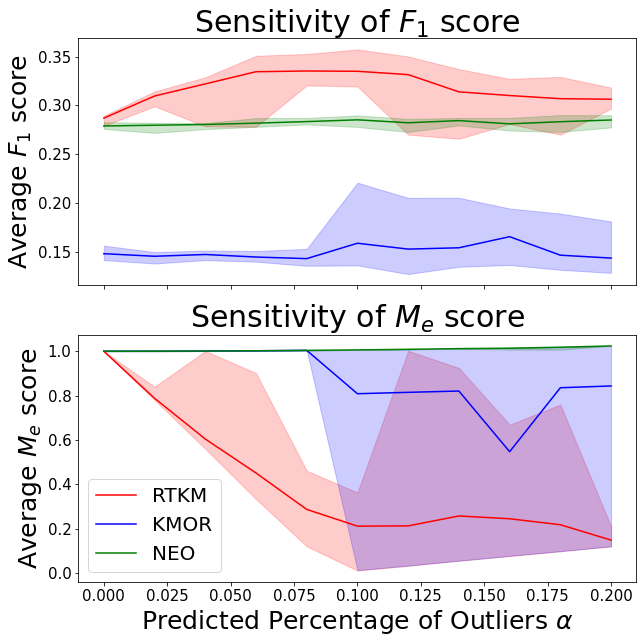

In [28]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (10,10))
ax1.plot(alpha_vals, f1_avg_rtkm, label = 'RTKM', c = 'r')
ax1.plot(alpha_vals, f1_avg_kmor, label = 'KMOR', c = 'b')
ax1.plot(alpha_vals, f1_avg_neo, label = 'NEO', c = 'g')
ax1.fill_between(alpha_vals, min_rtkm[0,:], max_rtkm[0,:], color = 'r', alpha = 0.2)
ax1.fill_between(alpha_vals, min_kmor[0,:], max_kmor[0,:], color = 'b', alpha = 0.2)
ax1.fill_between(alpha_vals, min_neo[0,:], max_neo[0,:], color = 'g', alpha = 0.2)
ax1.set_title('Sensitivity of $F_1$ score')
ax1.set_ylabel('Average $F_1$ score')
ax1.yaxis.label.set_fontsize(25)
ax1.title.set_fontsize(30)
ax1.tick_params(axis='y', labelsize=15)
# ax1.legend()

ax2.plot(alpha_vals, me_avg_rtkm, label = 'RTKM', c = 'r')
ax2.plot(alpha_vals, me_avg_kmor, label = 'KMOR', c = 'b')
ax2.plot(alpha_vals, me_avg_neo, label = 'NEO', c = 'g')
ax2.fill_between(alpha_vals, min_rtkm[1,:], max_rtkm[1,:], color = 'r', alpha = 0.2)
ax2.fill_between(alpha_vals, min_kmor[1,:], max_kmor[1,:], color = 'b', alpha = 0.2)
ax2.fill_between(alpha_vals, min_neo[1,:], max_neo[1,:], color = 'g', alpha = 0.2)
ax2.set_title('Sensitivity of $M_e$ score')
ax2.set_ylabel('Average $M_e$ score')
ax2.set_xlabel('Predicted Percentage of Outliers ' r'$\alpha$')
ax2.xaxis.label.set_fontsize(25)
ax2.yaxis.label.set_fontsize(25)
ax2.title.set_fontsize(30)
ax2.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.legend(fontsize = 20)

plt.savefig('updatedyeastwoutliers', format='pdf')

Load results from paper

In [ ]:
alpha_vals = np.linspace(0, .20, 11) 


me_avg_rtkm = np.load('figure_data/Me_avg_RTKM_yeast2.npy')
me_avg_kmor= np.load('figure_data/Me_avg_KMOR_yeast2.npy')
me_avg_kmor_1 = np.load('figure_data/Me_avg_KMOR_yeast1_2.npy')
me_avg_neo = np.load('figure_data/Me_avg_NEO_yeast2.npy')

f1_avg_rtkm = np.load('figure_data/f1_avg_RTKM_yeast2.npy')
f1_avg_kmor = np.load('figure_data/f1_avg_KMOR_yeast2.npy')
f1_avg_kmor_1 = np.load('figure_data/f1_avg_KMOR_yeast1_2.npy')
f1_avg_neo = np.load('figure_data/f1_avg_NEO_yeast2.npy')

min_rtkm = np.load('figure_data/min_RTKM2.npy')
max_rtkm = np.load('figure_data/max_RTKM2.npy')

min_kmor = np.load('figure_data/min_KMOR2.npy')
max_kmor = np.load('figure_data/max_KMOR2.npy')

min_kmor_1 = np.load('figure_data/min_KMOR_1_2.npy')
max_kmor_1 = np.load('figure_data/max_KMOR_1_2.npy')

min_neo = np.load('figure_data/min_NEO2.npy')
max_neo = np.load('figure_data/max_NEO2.npy')



In [ ]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (10,10))
ax1.plot(alpha_vals, f1_avg_rtkm, label = 'RTKM', c = 'r')
ax1.plot(alpha_vals, f1_avg_kmor, label = 'KMOR', c = 'b')
ax1.plot(alpha_vals, f1_avg_kmor_1, label = 'KMOR gamma = 1', c = 'b')
ax1.plot(alpha_vals, f1_avg_neo, label = 'NEO', c = 'g')
ax1.fill_between(alpha_vals, min_rtkm[0,:], max_rtkm[0,:], color = 'r', alpha = 0.2)
ax1.fill_between(alpha_vals, min_kmor[0,:], max_kmor[0,:], color = 'b', alpha = 0.2)
ax1.fill_between(alpha_vals, min_kmor_1[0,:], max_kmor_1[0,:], color = 'b', alpha = 0.2)
ax1.fill_between(alpha_vals, min_neo[0,:], max_neo[0,:], color = 'g', alpha = 0.2)
ax1.set_title('Sensitivity of $F_1$ score')
ax1.set_ylabel('Average $F_1$ score')
ax1.yaxis.label.set_fontsize(25)
ax1.title.set_fontsize(30)
ax1.tick_params(axis='y', labelsize=15)
# ax1.legend()

ax2.plot(alpha_vals, me_avg_rtkm, label = 'RTKM', c = 'r')
ax2.plot(alpha_vals, me_avg_kmor, label = 'KMOR', c = 'b')
ax2.plot(alpha_vals, me_avg_kmor_1, label = 'KMOR', c = 'b')
ax2.plot(alpha_vals, me_avg_neo, label = 'NEO', c = 'g')
ax2.fill_between(alpha_vals, min_rtkm[1,:], max_rtkm[1,:], color = 'r', alpha = 0.2)
ax2.fill_between(alpha_vals, min_kmor_1[1,:], max_kmor_1[1,:], color = 'b', alpha = 0.2)
ax2.fill_between(alpha_vals, min_neo[1,:], max_neo[1,:], color = 'g', alpha = 0.2)
ax2.set_title('Sensitivity of $M_e$ score')
ax2.set_ylabel('Average $M_e$ score')
ax2.set_xlabel('Predicted Percentage of Outliers ' r'$\alpha$')
ax2.xaxis.label.set_fontsize(25)
ax2.yaxis.label.set_fontsize(25)
ax2.title.set_fontsize(30)
ax2.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.legend(fontsize = 20)

# Scene plus noise

In [24]:
# np.save('scene_out', data)
# np.save('scene_true_out', true_out)
# np.save('scene_out_labels', labels)

data = np.load('scene_out_3.npy')
labels = np.load('scene_out_labels_3.npy')
true_out = np.load('scene_true_out_3.npy')

In [14]:
scene, meta = arff.loadarff('datasets/scene/scene-train.arff')
scene_data = pd.DataFrame(scene)
data = scene_data.iloc[:,:-6].to_numpy().astype(float)
labels = scene_data.iloc[:,-6:].to_numpy().astype(int)

data = data.T
labels = labels.T

# Create 10% noise
m,n = data.shape
num_out = 20
k=6

########
# add_noise = np.random.normal(0,1.5, (m, num_out))
# data_noise = data[:, np.random.choice(n,num_out)]
# data = np.hstack((data, data_noise + add_noise))
# true_out= np.arange(n, n + num_out)


# labels = np.hstack((labels, np.zeros((k,num_out))))
# outlier_row = np.zeros(n+num_out)
# outlier_row[true_out]=1

# labels = np.vstack((labels, outlier_row))
########

avg_feat_vals = np.average(data, axis = 1)
std_feat_vals = np.std(data, axis =1)

outlier_dat = np.zeros((m, num_out))

for i in range(num_out):
    outlier_dat[:,i] = avg_feat_vals + np.random.rand(m)*5*std_feat_vals

print(outlier_dat.shape)
data = np.hstack((data, outlier_dat))

true_out= np.arange(n, n + num_out)
labels = np.hstack((labels, np.zeros((k,num_out))))
outlier_row = np.zeros(n+num_out)
outlier_row[true_out]=1
labels = np.vstack((labels, outlier_row))




(294, 20)


Text(0.5, 1.0, 'Scene Dataset Visualized Against Top 2 Principle Components')

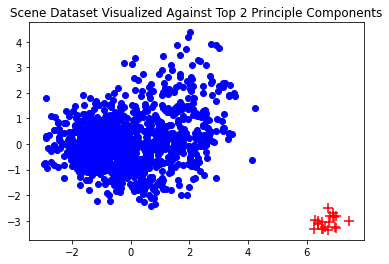

In [25]:
pca = PCA(n_components=3)
pca.fit(data.T)
Xnew = pca.transform(data.T)
Xnew = Xnew.T

plt.figure()
plt.scatter(Xnew[0,:-20], Xnew[1,:-20], c = 'b')
plt.scatter(Xnew[0,true_out], Xnew[1,true_out], c='r', marker = "+", s = 100)

plt.title('Scene Dataset Visualized Against Top 2 Principle Components')




Iteration 100
Iteration 200


 Number of true positives:  [126, 111, 141, 147, 69, 116, 20] 

 Number of false positives :  [136, 27, 27, 42, 116, 149, 4] 

 Number of true negatives:  [868, 1039, 1007, 993, 838, 858, 1207] 

 Number of false negatives:  [101, 54, 56, 49, 208, 108, 0] 

 F1 scores for each cluster:  [0.51533742 0.73267327 0.77260274 0.76363636 0.2987013  0.47443763
 0.90909091] 

 Average F1 score:  0.6380685185151538 

 me score: 0.0033030553261767133


Text(0.5, 1.0, 'Robust Trimmed k Means')

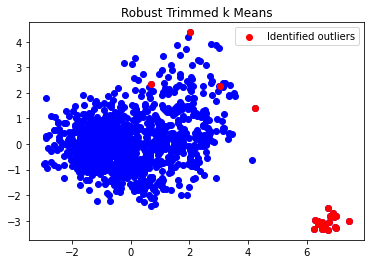

In [16]:
RTKM_yeast = RTKM(data)
RTKM_yeast.perform_clustering(k=6, percent_outliers = 0.02, max_iter = 400, num_members = 1) 
pred_clusters, pred_outliers = RTKM_yeast.return_clusters()

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = RTKM_yeast.weights, membership_option = 'multi', pred_outliers = RTKM_yeast.outliers)

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

plt.figure()

plt.scatter(Xnew[0,:], Xnew[1,:], c = 'b')
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c = 'r', label = 'Identified outliers')
# plt.scatter(RTKM_yeast.centers[0,:], RTKM_yeast.centers[1,:], c = 'b', label = 'Calculated Centers')
plt.legend()
plt.title('Robust Trimmed k Means')
#plt.savefig('MyMethodTrimmed')



 Number of true positives:  [94, 123, 0, 157, 139, 88, 19] 

 Number of false positives :  [105, 121, 1, 83, 190, 106, 5] 

 Number of true negatives:  [899, 945, 1033, 952, 764, 901, 1206] 

 Number of false negatives:  [133, 42, 197, 39, 138, 136, 1] 

 F1 scores for each cluster:  [0.44131455 0.60146699 0.         0.72018349 0.45874587 0.42105263
 0.86363636] 

 Average F1 score:  0.5009142718138497 

 me score: 0.050170181857724684


Text(0.5, 1.0, 'KMOR')

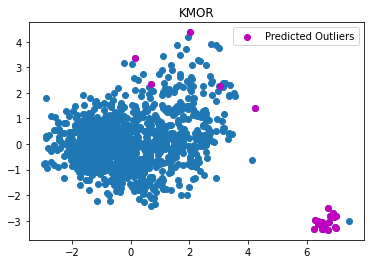

In [23]:
pred_labels_KMOR, pred_outliers_KMOR = run_kmor(data, k=6, percent_outliers= 0.02, gamma = 1)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = pred_labels_KMOR, membership_option = 'multi',pred_outliers = pred_outliers_KMOR)

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

pred_outliers = np.where(pred_outliers_KMOR == 0)[0]

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c= 'm', label= 'Predicted Outliers')
plt.legend()
plt.title('KMOR')

    _pyeval at line 57 column 30

***** iteration: 1, objective: 9532.558630
***** iteration: 2, objective: 9275.822509
***** iteration: 3, objective: 9160.246357
***** iteration: 4, objective: 9087.419784
***** iteration: 5, objective: 9043.549362
***** iteration: 6, objective: 9024.838404
***** iteration: 7, objective: 9018.031551
***** iteration: 8, objective: 9012.750753
***** iteration: 9, objective: 9009.353772
***** iteration: 10, objective: 9006.427144
***** iteration: 11, objective: 9003.339371
***** iteration: 12, objective: 9000.099306
***** iteration: 13, objective: 8996.263616
***** iteration: 14, objective: 8993.469356
***** iteration: 15, objective: 8991.447796
***** iteration: 16, objective: 8990.432055
***** iteration: 17, objective: 8989.900773
***** iteration: 18, objective: 8989.238721
***** iteration: 19, objective: 8988.838022
***** iteration: 20, objective: 8988.361830
***** iteration: 21, objective: 8987.907430
***** iteration: 22, objective: 8987.317014
***** i

Text(0.5, 1.0, 'NEO-k-means')

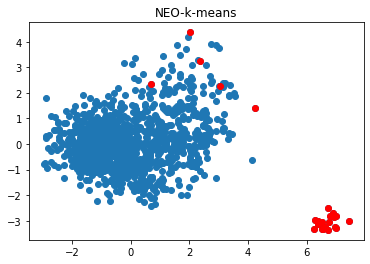

In [18]:
pred_labels_NEO, pred_outliers_NEO = run_neo(data, path_to_neo='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m'
        , k=6, percent_outliers=.02, sigma = 0, init_centers = None)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = pred_labels_NEO, membership_option = 'multi', pred_outliers = pred_outliers_NEO)

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

outliers = np.where(pred_outliers_NEO == 0)

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,outliers], Xnew[1,outliers], c= 'r')
plt.title('NEO-k-means')



In [19]:
alpha_vals = np.linspace(0, .10, 11) 

f1_avg_rtkm, f1_avg_kmor, f1_avg_neo, me_avg_rtkm, me_avg_kmor, me_avg_neo, \
min_rtkm, max_rtkm, min_kmor, max_kmor, min_neo, max_neo = sensitivity_to_alpha(data, k=6, kmor_gamma= 1, 
                                                                                neo_sigma = 0, path_to_neo='/Users/olgadorabiala/Documents/ThesisResearch/PALM/neo_k_means_vector/neo_kmeans/neo_kmeans.m',
                                                                                alpha_vals= alpha_vals, iterations= 50, true_clusters=labels,
                                                                                membership_option= 'multi', rtkm_sigma = 1)
    
    

Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9763.880746
***** iteration: 2, objective: 9763.880746
***** No. of iterations done: 2
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9757.384093
***** iteration: 2, objective: 9757.384093
***** No. of iterations done: 2
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9649.039622
***** iteration: 2, objective: 9649.039622
***** No. of iterations done: 2
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
    _p

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9644.502055
***** iteration: 2, objective: 9644.502055
***** No. of iterations done: 2
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9645.307482
***** iteration: 2, objective: 9645.307482
***** No. of iterations done: 2
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9760.441522
***** iteration: 2, objective: 9760.441522
***** No. of iterations done: 2
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iterat

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9791.851755
***** iteration: 2, objective: 9791.851755
***** No. of iterations done: 2
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9649.108836
***** iteration: 2, objective: 9649.108836
***** No. of iterations done: 2
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9648.933843
***** iteration: 2, objective: 9648.933843
***** No. of iterations done: 2
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iterat

***** No. of iterations done: 2
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9645.500487
***** iteration: 2, objective: 9645.500487
***** No. of iterations done: 2
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9779.054272
***** iteration: 2, objective: 9779.054272
***** No. of iterations done: 2
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval 

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9652.088922
***** iteration: 2, objective: 9652.088922
***** No. of iterations done: 2
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9758.800698
***** iteration: 2, objective: 9758.800698
***** No. of iterations done: 2
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9831.798781
***** iteration: 2, objective: 9831.798781
***** No. of iterations done: 2
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
Iterat

***** iteration: 3, objective: 9549.486169
***** iteration: 4, objective: 9548.085898
***** iteration: 5, objective: 9547.528573
***** iteration: 6, objective: 9547.196347
***** iteration: 7, objective: 9547.132222
***** iteration: 8, objective: 9547.100032
***** iteration: 9, objective: 9547.100032
***** No. of iterations done: 9
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.010, betaN: 12
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9582.078261
***** iteration: 2, objective: 9564.140286
***** iteration: 3, objective: 9561.171778
***** iteration: 4, objective: 9560.170522
***** iteration: 5, objective: 9559.462897
***** iteration: 6, objective: 9558.763779
***** iteration: 7, objective: 9558.433346
***** iteration: 8, objective: 9558.373084
***** iteration: 9, objective: 9558.285558
***** iteration: 10, objective: 9558.232569
***** iteration: 11, objective:

***** No. of iterations done: 7
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.010, betaN: 12
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9391.591062
***** iteration: 2, objective: 9387.453860
***** iteration: 3, objective: 9387.361377
***** iteration: 4, objective: 9387.262771
***** iteration: 5, objective: 9387.262771
***** No. of iterations done: 5
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.010, betaN: 12
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9584.361387
***** iteration: 2, objective: 9566.265721
***** iteration: 3, objective: 9563.396384
***** iteration: 4, objective: 9560.990853
***** iteration: 5, objective: 9559.974968
***** iteration: 6, objective: 9559.448093
***** iteration: 7, objective: 9559.340662
***** iteration: 8, obje

***** iteration: 6, objective: 9605.697068
***** iteration: 7, objective: 9605.354364
***** iteration: 8, objective: 9604.277989
***** iteration: 9, objective: 9602.833319
***** iteration: 10, objective: 9598.880202
***** iteration: 11, objective: 9593.787430
***** iteration: 12, objective: 9587.040243
***** iteration: 13, objective: 9578.951251
***** iteration: 14, objective: 9572.805848
***** iteration: 15, objective: 9569.112323
***** iteration: 16, objective: 9566.645155
***** iteration: 17, objective: 9565.254598
***** iteration: 18, objective: 9564.082167
***** iteration: 19, objective: 9562.909655
***** iteration: 20, objective: 9561.583220
***** iteration: 21, objective: 9560.778717
***** iteration: 22, objective: 9560.108897
***** iteration: 23, objective: 9559.499062
***** iteration: 24, objective: 9557.992402
***** iteration: 25, objective: 9556.601864
***** iteration: 26, objective: 9555.611041
***** iteration: 27, objective: 9554.951048
***** iteration: 28, objective: 9554

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


***** iteration: 5, objective: 9942.659323
***** No. of iterations done: 5
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.010, betaN: 12
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9581.206195
***** iteration: 2, objective: 9561.760579
***** iteration: 3, objective: 9559.416586
***** iteration: 4, objective: 9558.795512
***** iteration: 5, objective: 9558.795512
***** No. of iterations done: 5
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.010, betaN: 12
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9566.509220
***** iteration: 2, objective: 9549.820669
***** iteration: 3, objective: 9548.018016
***** iteration: 4, objective: 9547.27707

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9395.800236
***** iteration: 2, objective: 9390.713421
***** iteration: 3, objective: 9390.203889
***** iteration: 4, objective: 9389.940436
***** iteration: 5, objective: 9389.879762
***** iteration: 6, objective: 9389.591522
***** iteration: 7, objective: 9389.445427
***** iteration: 8, objective: 9389.412784
***** iteration: 9, objective: 9389.328589
***** iteration: 10, objective: 9389.079522
***** iteration: 11, objective: 9389.055135
***** iteration: 12, objective: 9389.021771
***** iteration: 13, objective: 9389.021771
***** No. of iterations done: 13
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.010, betaN: 12
Iteration 100
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9389.299684
***** iteration: 2, objective: 9384.669858
***** iteration: 3, objective: 9384.419053
***** iteration: 4, objective: 

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9578.883591
***** iteration: 2, objective: 9559.692784
***** iteration: 3, objective: 9556.348523
***** iteration: 4, objective: 9555.516705
***** iteration: 5, objective: 9555.097960
***** iteration: 6, objective: 9554.826603
***** iteration: 7, objective: 9554.568579
***** iteration: 8, objective: 9554.490260
***** iteration: 9, objective: 9554.446453
***** iteration: 10, objective: 9554.446453
***** No. of iterations done: 10
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.010, betaN: 12
Iteration 100
Iteration 200
Iteration 300
Iteration 400
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9647.570496
***** iteration: 2, objective: 9628.780247
***** iteration: 3, objective: 9626.392885
***** iteration: 4, objective: 9625.431896
***** iteration: 5, objective: 9625.001783
***** iteration: 6, objective: 9624

***** iteration: 22, objective: 9554.854593
***** iteration: 23, objective: 9553.542168
***** iteration: 24, objective: 9552.298735
***** iteration: 25, objective: 9550.869083
***** iteration: 26, objective: 9550.046376
***** iteration: 27, objective: 9548.893799
***** iteration: 28, objective: 9548.384050
***** iteration: 29, objective: 9548.026802
***** iteration: 30, objective: 9547.594741
***** iteration: 31, objective: 9547.387301
***** iteration: 32, objective: 9547.066476
***** iteration: 33, objective: 9547.066476
***** No. of iterations done: 33
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.010, betaN: 12
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9655.987160
***** iteration: 2, objective: 9638.200876
***** iteration: 3, objective: 9636.478021
***** iteration: 4, objective: 9635.894625
***** iteration: 5, objective: 9635.257678
***** iteration: 6,

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9249.078412
***** iteration: 2, objective: 9235.439407
***** iteration: 3, objective: 9235.320453
***** iteration: 4, objective: 9235.320453
***** No. of iterations done: 4
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.020, betaN: 25
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9049.015157
***** iteration: 2, objective: 8986.402650
***** iteration: 3, objective: 8980.680868
***** iteration: 4, objective: 8978.542642
***** iteration: 5, objective: 8977.701455
***** iteration: 6, objective: 8977.129387
***** iteration: 7, objective: 8977.129387
***** No. of iterations done: 7
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.020, betaN: 25
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 co

***** iteration: 8, objective: 9101.934644
***** iteration: 9, objective: 9097.803984
***** iteration: 10, objective: 9094.705523
***** iteration: 11, objective: 9093.015872
***** iteration: 12, objective: 9091.630193
***** iteration: 13, objective: 9088.336914
***** iteration: 14, objective: 9081.646060
***** iteration: 15, objective: 9074.865953
***** iteration: 16, objective: 9070.796175
***** iteration: 17, objective: 9065.719870
***** iteration: 18, objective: 9059.343651
***** iteration: 19, objective: 9056.651949
***** iteration: 20, objective: 9055.714235
***** iteration: 21, objective: 9055.363884
***** iteration: 22, objective: 9054.769467
***** iteration: 23, objective: 9054.208568
***** iteration: 24, objective: 9053.596402
***** iteration: 25, objective: 9053.444403
***** iteration: 26, objective: 9053.444403
***** No. of iterations done: 26
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.020, betaN: 25
Iteration 100
Iteration 200
    _pyev

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9051.048718
***** iteration: 2, objective: 8984.959675
***** iteration: 3, objective: 8978.346872
***** iteration: 4, objective: 8977.357822
***** iteration: 5, objective: 8977.307067
***** iteration: 6, objective: 8977.272076
***** iteration: 7, objective: 8977.272076
***** No. of iterations done: 7
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.020, betaN: 25
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9045.839433
***** iteration: 2, objective: 8986.533391
***** iteration: 3, objective: 8982.489999
***** iteration: 4, objective: 8980.405008
***** iteration: 5, objective: 8979.970984
***** iteration: 6, objective: 8979.829942
***** iteration: 7, objective: 8979.829942
***** No. of iterations done: 7
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
*

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9119.318251
***** iteration: 2, objective: 9057.451843
***** iteration: 3, objective: 9053.008451
***** iteration: 4, objective: 9050.993996
***** iteration: 5, objective: 9050.443965
***** iteration: 6, objective: 9049.897657
***** iteration: 7, objective: 9049.897657
***** No. of iterations done: 7
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.020, betaN: 25
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9249.415047
***** iteration: 2, objective: 9235.618080
***** iteration: 3, objective: 9235.383104
***** iteration: 4, objective: 9235.345712
***** iteration: 5, objective: 9235.345712
***** No. of iterations done: 5
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.020, betaN: 25
Iteration 100
Iteration 

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9153.768096
***** iteration: 2, objective: 9111.526965
***** iteration: 3, objective: 9106.301430
***** iteration: 4, objective: 9103.233446
***** iteration: 5, objective: 9101.000277
***** iteration: 6, objective: 9094.902420
***** iteration: 7, objective: 9082.878843
***** iteration: 8, objective: 9067.769341
***** iteration: 9, objective: 9049.109991
***** iteration: 10, objective: 9023.191292
***** iteration: 11, objective: 9003.583224
***** iteration: 12, objective: 8996.229306
***** iteration: 13, objective: 8992.295081
***** iteration: 14, objective: 8990.093923
***** iteration: 15, objective: 8988.955495
***** iteration: 16, objective: 8988.063998
***** iteration: 17, objective: 8987.501388
***** iteration: 18, objective: 8986.959257
***** iteration: 19, objective: 8986.828692
***** iteration: 20, objective: 8986.828692
***** No. of iterations done: 20
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8851.643446
***** iteration: 2, objective: 8780.298771
***** iteration: 3, objective: 8772.245299
***** iteration: 4, objective: 8770.491196
***** iteration: 5, objective: 8770.118914
***** iteration: 6, objective: 8769.880257
***** iteration: 7, objective: 8769.431561
***** iteration: 8, objective: 8768.841949
***** iteration: 9, objective: 8768.429276
***** iteration: 10, objective: 8768.115779
***** iteration: 11, objective: 8768.032074
***** iteration: 12, objective: 8768.032074
***** No. of iterations done: 12
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 37
Iteration 100
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9122.200598
***** iteration: 2, objective: 9033.880326
***** iteration: 3, objective: 8975.131954
***** iteration: 4, objective: 8953.282044
***** iteration: 5, objective: 8942.510206
***** iteration: 6, obj

***** iteration: 33, objective: 8769.206886
***** iteration: 34, objective: 8769.086207
***** iteration: 35, objective: 8769.086207
***** No. of iterations done: 35
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 37
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9009.740144
***** iteration: 2, objective: 8954.889716
***** iteration: 3, objective: 8950.230816
***** iteration: 4, objective: 8949.250163
***** iteration: 5, objective: 8949.188462
***** iteration: 6, objective: 8949.188462
***** No. of iterations done: 6
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 37
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8854.108112
***** iteration: 2, objective: 8784.360068
***** iteration: 3, objective: 8777.525132
***** iteration: 4, objective: 877

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8856.069243
***** iteration: 2, objective: 8783.349310
***** iteration: 3, objective: 8778.837705
***** iteration: 4, objective: 8777.794062
***** iteration: 5, objective: 8777.755741
***** iteration: 6, objective: 8777.755741
***** No. of iterations done: 6
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 37
Iteration 100
Iteration 200
Iteration 300
Iteration 400
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8946.312875
***** iteration: 2, objective: 8886.642773
***** iteration: 3, objective: 8879.416505
***** iteration: 4, objective: 8875.926603
***** iteration: 5, objective: 8874.088427
***** iteration: 6, objective: 8871.898170
***** iteration: 7, objective: 8870.761440
***** iteration: 8, objective: 8870.496337
***** iteration: 9, objective: 8870.496337
***** No. of iterations done: 9
*****

***** iteration: 6, objective: 8848.020374
***** iteration: 7, objective: 8845.411016
***** iteration: 8, objective: 8839.150645
***** iteration: 9, objective: 8825.014740
***** iteration: 10, objective: 8812.807220
***** iteration: 11, objective: 8803.750210
***** iteration: 12, objective: 8796.364518
***** iteration: 13, objective: 8792.656341
***** iteration: 14, objective: 8789.035794
***** iteration: 15, objective: 8786.750533
***** iteration: 16, objective: 8784.178772
***** iteration: 17, objective: 8781.757525
***** iteration: 18, objective: 8780.400853
***** iteration: 19, objective: 8779.846852
***** iteration: 20, objective: 8779.517603
***** iteration: 21, objective: 8779.301422
***** iteration: 22, objective: 8779.212170
***** iteration: 23, objective: 8779.158867
***** iteration: 24, objective: 8779.087372
***** iteration: 25, objective: 8779.087372
***** No. of iterations done: 25
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 32 column 9

***** iteration: 1, objective: 9066.998781
***** iteration: 2, objective: 8996.560312
***** iteration: 3, objective: 8990.363040
***** iteration: 4, objective: 8988.781419
***** iteration: 5, objective: 8988.375450
***** iteration: 6, objective: 8988.040161
***** iteration: 7, objective: 8987.971945
***** iteration: 8, objective: 8987.934270
***** iteration: 9, objective: 8987.864614
***** iteration: 10, objective: 8987.864614
***** No. of iterations done: 10
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 37
Iteration 100
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8847.081056
***** iteration: 2, objective: 8782.788539
***** iteration: 3, objective: 8777.154178
***** iteration: 4, objective: 8776.485222
***** iteration: 5, objective: 8776.338511
***** iteration: 6, objective: 8776.338511
***** No. of iterations done: 6
***** Total no. of data points: 1231

***** iteration: 12, objective: 8775.659970
***** iteration: 13, objective: 8775.659970
***** No. of iterations done: 13
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 37
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8988.579006
***** iteration: 2, objective: 8966.253346
***** iteration: 3, objective: 8965.839643
***** iteration: 4, objective: 8965.785095
***** iteration: 5, objective: 8965.785095
***** No. of iterations done: 5
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 37
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8857.543741
***** iteration: 2, objective: 8783.157215
***** iteration: 3, objective: 8773.259781
***** iteration: 4, objective: 8771.399685
***** iteration: 5, objective: 8770.480963
***** i


***** iteration: 1, objective: 8923.350513
***** iteration: 2, objective: 8858.657734
***** iteration: 3, objective: 8852.548926
***** iteration: 4, objective: 8850.829041
***** iteration: 5, objective: 8850.381537
***** iteration: 6, objective: 8850.298179
***** iteration: 7, objective: 8850.223701
***** iteration: 8, objective: 8850.199861
***** iteration: 9, objective: 8850.199861
***** No. of iterations done: 9
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 37
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8927.584738
***** iteration: 2, objective: 8855.214957
***** iteration: 3, objective: 8850.196856
***** iteration: 4, objective: 8848.525597
***** iteration: 5, objective: 8848.343880
***** iteration: 6, objective: 8848.343880
***** No. of iterations done: 6
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 37
Ite

***** iteration: 5, objective: 8697.254811
***** iteration: 6, objective: 8697.049955
***** iteration: 7, objective: 8696.799027
***** iteration: 8, objective: 8696.702431
***** iteration: 9, objective: 8696.702431
***** No. of iterations done: 9
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.040, betaN: 49
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8761.327450
***** iteration: 2, objective: 8702.553704
***** iteration: 3, objective: 8698.387264
***** iteration: 4, objective: 8697.200130
***** iteration: 5, objective: 8696.487625
***** iteration: 6, objective: 8696.390167
***** iteration: 7, objective: 8696.390167
***** No. of iterations done: 7
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.040, betaN: 49
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at 

***** iteration: 6, objective: 8581.431169
***** No. of iterations done: 6
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.040, betaN: 49
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8667.886084
***** iteration: 2, objective: 8595.748761
***** iteration: 3, objective: 8591.244711
***** iteration: 4, objective: 8590.009667
***** iteration: 5, objective: 8589.932258
***** iteration: 6, objective: 8589.932258
***** No. of iterations done: 6
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.040, betaN: 49
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8673.170739
***** iteration: 2, objective: 8589.332608
***** iterati

***** iteration: 29, objective: 8602.311751
***** iteration: 30, objective: 8601.526680
***** iteration: 31, objective: 8600.637760
***** iteration: 32, objective: 8600.024986
***** iteration: 33, objective: 8599.960675
***** iteration: 34, objective: 8599.931264
***** iteration: 35, objective: 8599.931264
***** No. of iterations done: 35
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.040, betaN: 49
Iteration 100
Iteration 200
Iteration 300
Iteration 400
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8688.665084
***** iteration: 2, objective: 8612.604190
***** iteration: 3, objective: 8603.344611
***** iteration: 4, objective: 8602.435434
***** iteration: 5, objective: 8601.705587
***** iteration: 6, objective: 8601.263361
***** iteration: 7, objective: 8600.926024
***** iteration: 8, objective: 8600.843839
***** iteration: 9, objective: 8600.843839
***** No. of iterations done: 9
***** Total no. of da

Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8673.876810
***** iteration: 2, objective: 8597.783117
***** iteration: 3, objective: 8593.763456
***** iteration: 4, objective: 8592.705572
***** iteration: 5, objective: 8592.417223
***** iteration: 6, objective: 8592.110292
***** iteration: 7, objective: 8591.777097
***** iteration: 8, objective: 8591.624376
***** iteration: 9, objective: 8591.526843
***** iteration: 10, objective: 8591.388063
***** iteration: 11, objective: 8591.270333
***** iteration: 12, objective: 8591.073204
***** iteration: 13, objective: 8590.939092
***** iteration: 14, objective: 8590.862973
***** iteration: 15, objective: 8590.456399
***** iteration: 16, objective: 8590.362750
***** iteration: 17, objective: 8590.362750
***** No. of iterations done: 17
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.040, betaN: 49
Iteration 100
Iteration 200
Iteration 300
    _pyev

***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.040, betaN: 49
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8667.434870
***** iteration: 2, objective: 8589.871942
***** iteration: 3, objective: 8583.273159
***** iteration: 4, objective: 8581.431041
***** iteration: 5, objective: 8581.376976
***** iteration: 6, objective: 8581.376976
***** No. of iterations done: 6
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.040, betaN: 49
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8881.491786
***** iteration: 2, objective: 8804.010344
***** iteration: 3, objective: 8773.446288
***** iteration: 4, objective: 8756.585196
***** iteration: 5, objective: 8744.976562
***** iteration: 6, objective: 8722.034549
***** iteration: 7, objectiv

***** iteration: 6, objective: 8593.744147
***** iteration: 7, objective: 8593.659544
***** iteration: 8, objective: 8593.580033
***** iteration: 9, objective: 8593.514143
***** iteration: 10, objective: 8593.471619
***** iteration: 11, objective: 8593.392669
***** iteration: 12, objective: 8593.392669
***** No. of iterations done: 12
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.040, betaN: 49
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8740.600582
***** iteration: 2, objective: 8670.185921
***** iteration: 3, objective: 8666.806128
***** iteration: 4, objective: 8665.988942
***** iteration: 5, objective: 8665.631171
***** iteration: 6, objective: 8665.475545
***** iteration: 7, objective: 8665.475545
***** No. of iterations done: 7
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.04

***** iteration: 6, objective: 8487.801316
***** iteration: 7, objective: 8487.801316
***** No. of iterations done: 7
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 62
Iteration 100
Iteration 200
Iteration 300
Iteration 400
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8501.580673
***** iteration: 2, objective: 8424.891424
***** iteration: 3, objective: 8420.140351
***** iteration: 4, objective: 8418.124850
***** iteration: 5, objective: 8417.366719
***** iteration: 6, objective: 8417.190402
***** iteration: 7, objective: 8417.101561
***** iteration: 8, objective: 8417.058821
***** iteration: 9, objective: 8416.986127
***** iteration: 10, objective: 8416.986127
***** No. of iterations done: 10
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 62
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 colu

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8558.983123
***** iteration: 2, objective: 8478.599867
***** iteration: 3, objective: 8472.227952
***** iteration: 4, objective: 8469.898717
***** iteration: 5, objective: 8467.682517
***** iteration: 6, objective: 8466.459164
***** iteration: 7, objective: 8464.473084
***** iteration: 8, objective: 8463.700894
***** iteration: 9, objective: 8462.301277
***** iteration: 10, objective: 8460.257229
***** iteration: 11, objective: 8457.554286
***** iteration: 12, objective: 8454.235071
***** iteration: 13, objective: 8447.740955
***** iteration: 14, objective: 8441.586623
***** iteration: 15, objective: 8435.064093
***** iteration: 16, objective: 8430.214692
***** iteration: 17, objective: 8427.498737
***** iteration: 18, objective: 8425.635533
***** iteration: 19, objective: 8424.490222
***** iteration: 20, objective: 8423.414830
***** iteration: 21, objective: 8422.597200
***** iteration: 22, objective: 8422.379336
***** it

***** iteration: 3, objective: 8512.436757
***** iteration: 4, objective: 8511.421841
***** iteration: 5, objective: 8510.861900
***** iteration: 6, objective: 8510.123459
***** iteration: 7, objective: 8509.828139
***** iteration: 8, objective: 8509.527274
***** iteration: 9, objective: 8509.457075
***** iteration: 10, objective: 8509.312718
***** iteration: 11, objective: 8509.084058
***** iteration: 12, objective: 8508.939428
***** iteration: 13, objective: 8508.511929
***** iteration: 14, objective: 8508.331027
***** iteration: 15, objective: 8508.274150
***** iteration: 16, objective: 8508.274150
***** No. of iterations done: 16
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 62
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8702.152765
***** iteration: 2, objective: 8683.826296
***** iteration: 3, objective: 8682.006328
***** iteration: 4, obje

***** No. of iterations done: 14
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 62
Iteration 100
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8507.788781
***** iteration: 2, objective: 8419.977413
***** iteration: 3, objective: 8408.800726
***** iteration: 4, objective: 8405.920147
***** iteration: 5, objective: 8404.719127
***** iteration: 6, objective: 8403.954414
***** iteration: 7, objective: 8403.339920
***** iteration: 8, objective: 8402.505889
***** iteration: 9, objective: 8402.227436
***** iteration: 10, objective: 8401.849278
***** iteration: 11, objective: 8401.760968
***** iteration: 12, objective: 8401.760968
***** No. of iterations done: 12
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 62
Iteration 100
Iteration 200
Iteration 300
Iteration 400
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1,

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8687.106807
***** iteration: 2, objective: 8604.339122
***** iteration: 3, objective: 8596.673348
***** iteration: 4, objective: 8593.666212
***** iteration: 5, objective: 8592.805697
***** iteration: 6, objective: 8592.049932
***** iteration: 7, objective: 8591.947371
***** iteration: 8, objective: 8591.947371
***** No. of iterations done: 8
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 62
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8498.524801
***** iteration: 2, objective: 8417.340226
***** iteration: 3, objective: 8411.113692
***** iteration: 4, objective: 8410.158876
***** iteration: 5, objective: 8409.603180
***** iteration: 6, objective: 8409.316294
***** iteration: 7, objective: 8408.926310
***** iteration: 8, objective: 8408.728857
***** iteration: 9, ob

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8496.754197
***** iteration: 2, objective: 8413.875838
***** iteration: 3, objective: 8407.506766
***** iteration: 4, objective: 8406.008765
***** iteration: 5, objective: 8405.632489
***** iteration: 6, objective: 8405.546588
***** iteration: 7, objective: 8405.546588
***** No. of iterations done: 7
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 62
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8502.017744
***** iteration: 2, objective: 8413.703900
***** iteration: 3, objective: 8404.740447
***** iteration: 4, objective: 8402.501122
***** iteration: 5, objective: 8401.992800
***** iteration: 6, objective: 8401.891963
***** iteration: 7, objective: 8401.777239
***** iteration: 8, objective: 8401.709000
***** iteration: 9, objective: 8401.679215



***** iteration: 1, objective: 8576.126017
***** iteration: 2, objective: 8515.180335
***** iteration: 3, objective: 8509.538270
***** iteration: 4, objective: 8508.368693
***** iteration: 5, objective: 8507.836431
***** iteration: 6, objective: 8507.155325
***** iteration: 7, objective: 8506.844185
***** iteration: 8, objective: 8506.591872
***** iteration: 9, objective: 8506.436172
***** iteration: 10, objective: 8506.366507
***** iteration: 11, objective: 8506.236883
***** iteration: 12, objective: 8506.142417
***** iteration: 13, objective: 8505.835835
***** iteration: 14, objective: 8505.709811
***** iteration: 15, objective: 8505.653831
***** iteration: 16, objective: 8505.551637
***** iteration: 17, objective: 8505.551637
***** No. of iterations done: 17
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 62
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8492.

***** iteration: 8, objective: 8416.638195
***** iteration: 9, objective: 8416.197581
***** iteration: 10, objective: 8416.006556
***** iteration: 11, objective: 8415.850577
***** iteration: 12, objective: 8415.696487
***** iteration: 13, objective: 8415.463839
***** iteration: 14, objective: 8415.463839
***** No. of iterations done: 14
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 62
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8354.574341
***** iteration: 2, objective: 8269.495380
***** iteration: 3, objective: 8260.901128
***** iteration: 4, objective: 8259.742904
***** iteration: 5, objective: 8259.430504
***** iteration: 6, objective: 8259.314116
***** iteration: 7, objective: 8259.275543
***** iteration: 8, objective: 8259.009500
***** iteration: 9, objective: 8258.947674
***** iteration: 10, objective: 8258.6894

***** iteration: 6, objective: 8328.284752
***** iteration: 7, objective: 8327.928963
***** iteration: 8, objective: 8327.546084
***** iteration: 9, objective: 8327.433801
***** iteration: 10, objective: 8327.433801
***** No. of iterations done: 10
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.060, betaN: 74
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8420.759467
***** iteration: 2, objective: 8331.588792
***** iteration: 3, objective: 8322.953326
***** iteration: 4, objective: 8317.223058
***** iteration: 5, objective: 8311.959788
***** iteration: 6, objective: 8308.650540
***** iteration: 7, objective: 8302.682074
***** iteration: 8, objective: 8296.918126
***** iteration: 9, objective: 8288.479048
***** iteration: 10, objective: 8275.075791
***** iteration: 11, objective: 8263.627470
***** iteration: 12, objective: 8258.493347
***** iteration: 13, object

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8400.619889
***** iteration: 2, objective: 8329.596417
***** iteration: 3, objective: 8323.834956
***** iteration: 4, objective: 8322.471884
***** iteration: 5, objective: 8321.384555
***** iteration: 6, objective: 8320.124223
***** iteration: 7, objective: 8319.382426
***** iteration: 8, objective: 8319.138903
***** iteration: 9, objective: 8319.000835
***** iteration: 10, objective: 8319.000835
***** No. of iterations done: 10
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.060, betaN: 74
Iteration 100
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8466.976523
***** iteration: 2, objective: 8395.094688
***** iteration: 3, objective: 8390.768396
***** iteration: 4, objective: 8389.212234
***** iteration: 5, objective: 8388.538513
***** iteration: 6, objective: 8387.460464
***** iteration: 7, objective: 8387.115785
***** iteration: 8, objec

***** iteration: 18, objective: 8248.668269
***** iteration: 19, objective: 8248.589271
***** iteration: 20, objective: 8248.557336
***** iteration: 21, objective: 8248.557336
***** No. of iterations done: 21
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.060, betaN: 74
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8412.403742
***** iteration: 2, objective: 8331.780927
***** iteration: 3, objective: 8325.324004
***** iteration: 4, objective: 8324.715559
***** iteration: 5, objective: 8324.674879
***** iteration: 6, objective: 8324.640921
***** iteration: 7, objective: 8324.580737
***** iteration: 8, objective: 8324.421598
***** iteration: 9, objective: 8324.377696
***** iteration: 10, objective: 8324.352877
***** iteration: 11, objective: 8324.352877
***** No. of iterations done: 11
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.060, betaN:

***** iteration: 2, objective: 8333.481377
***** iteration: 3, objective: 8329.371345
***** iteration: 4, objective: 8329.004993
***** iteration: 5, objective: 8328.867485
***** iteration: 6, objective: 8328.804660
***** iteration: 7, objective: 8328.804660
***** No. of iterations done: 7
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.060, betaN: 74
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8456.697798
***** iteration: 2, objective: 8397.579438
***** iteration: 3, objective: 8385.299368
***** iteration: 4, objective: 8380.373774
***** iteration: 5, objective: 8377.635098
***** iteration: 6, objective: 8375.482666
***** iteration: 7, objective: 8373.645381
***** iteration: 8, objective: 8372.584441
***** iteration: 9, objective: 8370.565300
***** iteration: 10, objective: 8368.093595
***** iteration: 11, objective: 

***** iteration: 2, objective: 8259.631303
***** iteration: 3, objective: 8250.525410
***** iteration: 4, objective: 8248.598000
***** iteration: 5, objective: 8248.055855
***** iteration: 6, objective: 8247.853796
***** iteration: 7, objective: 8247.435410
***** iteration: 8, objective: 8246.918010
***** iteration: 9, objective: 8246.528498
***** iteration: 10, objective: 8246.093239
***** iteration: 11, objective: 8246.035750
***** iteration: 12, objective: 8245.963730
***** iteration: 13, objective: 8245.899146
***** iteration: 14, objective: 8245.638576
***** iteration: 15, objective: 8245.533068
***** iteration: 16, objective: 8245.499636
***** iteration: 17, objective: 8245.499636
***** No. of iterations done: 17
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.060, betaN: 74
Iteration 100
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8365.496002
***** iteration: 2, objective: 8266.959114
***** it

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8454.860593
***** iteration: 2, objective: 8379.749295
***** iteration: 3, objective: 8376.178805
***** iteration: 4, objective: 8375.027366
***** iteration: 5, objective: 8374.672551
***** iteration: 6, objective: 8374.612149
***** iteration: 7, objective: 8374.612149
***** No. of iterations done: 7
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.060, betaN: 74
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8401.555582
***** iteration: 2, objective: 8326.334678
***** iteration: 3, objective: 8319.954945
***** iteration: 4, objective: 8317.716646
***** iteration: 5, objective: 8317.628806
***** iteration: 6, objective: 8317.565749
***** iteration: 7, objective: 8317.357186
***** iteration: 8, objective: 8317.295472
***** iteration: 9, objective: 8317.120765
***** iteratio

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8342.912507
***** iteration: 2, objective: 8256.099729
***** iteration: 3, objective: 8250.433402
***** iteration: 4, objective: 8249.415298
***** iteration: 5, objective: 8249.103304
***** iteration: 6, objective: 8249.103304
***** No. of iterations done: 6
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.060, betaN: 74
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8424.173682
***** iteration: 2, objective: 8340.793059
***** iteration: 3, objective: 8331.360189
***** iteration: 4, objective: 8329.648139
***** iteration: 5, objective: 8329.468245
***** iteration: 6, objective: 8329.468245
***** No. of iterations done: 6
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.060, betaN: 74
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 

***** iteration: 4, objective: 8314.670891
***** iteration: 5, objective: 8314.594381
***** iteration: 6, objective: 8314.571479
***** iteration: 7, objective: 8314.571479
***** No. of iterations done: 7
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.070, betaN: 86
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8203.524865
***** iteration: 2, objective: 8111.339177
***** iteration: 3, objective: 8106.027339
***** iteration: 4, objective: 8104.217789
***** iteration: 5, objective: 8103.613677
***** iteration: 6, objective: 8103.306993
***** iteration: 7, objective: 8103.252969
***** iteration: 8, objective: 8103.182435
***** iteration: 9, objective: 8103.182435
***** No. of iterations done: 9
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.070, betaN: 86
Iteration 100
Iteration 200
Iteration 300
Iteration 400
    _pyeval at line 

***** iteration: 11, objective: 8112.016889
***** iteration: 12, objective: 8111.930919
***** iteration: 13, objective: 8111.790502
***** iteration: 14, objective: 8111.498982
***** iteration: 15, objective: 8111.148622
***** iteration: 16, objective: 8110.647055
***** iteration: 17, objective: 8110.266147
***** iteration: 18, objective: 8109.612638
***** iteration: 19, objective: 8109.154305
***** iteration: 20, objective: 8108.947412
***** iteration: 21, objective: 8108.865290
***** iteration: 22, objective: 8108.865290
***** No. of iterations done: 22
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.070, betaN: 86
Iteration 100
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8225.333981
***** iteration: 2, objective: 8127.400211
***** iteration: 3, objective: 8119.093009
***** iteration: 4, objective: 8115.981364
***** iteration: 5, objective: 8114.079032
***** iteration: 6, objective: 8113.626085
****

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


***** iteration: 4, objective: 8664.410153
***** iteration: 5, objective: 8663.203987
***** iteration: 6, objective: 8662.380146
***** iteration: 7, objective: 8662.264174
***** iteration: 8, objective: 8662.181203
***** iteration: 9, objective: 8662.067561
***** iteration: 10, objective: 8661.796035
***** iteration: 11, objective: 8661.634087
***** iteration: 12, objective: 8661.584370
***** iteration: 13, objective: 8661.546754
***** iteration: 14, objective: 8661.546754
***** No. of iterations done: 14
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.070, betaN: 86
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8287.682462
***** iteration: 2, objective: 8196.118749
***** iteration: 3, objective: 8189.863784
***** iteration: 4, objective: 8187.128840
***** iteration: 5, objective: 8186.332246
***** iteration: 6, objective: 8185.973118
***** iteration: 7, objective: 8185.8242

***** iteration: 5, objective: 8120.596131
***** iteration: 6, objective: 8120.596131
***** No. of iterations done: 6
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.070, betaN: 86
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8242.910421
***** iteration: 2, objective: 8139.863687
***** iteration: 3, objective: 8129.049397
***** iteration: 4, objective: 8125.253514
***** iteration: 5, objective: 8122.322936
***** iteration: 6, objective: 8119.966830
***** iteration: 7, objective: 8118.124532
***** iteration: 8, objective: 8116.077532
***** iteration: 9, objective: 8114.536693
***** iteration: 10, objective: 8112.557451
***** iteration: 11, objective: 8111.583457
***** iteration: 12, objective: 8110.772246
***** iteration: 13, objective: 8110.577122
***** iteration: 14, objective

***** alpha: 0.000, alphaN: 0
***** beta: 0.070, betaN: 86
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8220.207527
***** iteration: 2, objective: 8116.928999
***** iteration: 3, objective: 8109.844044
***** iteration: 4, objective: 8108.134760
***** iteration: 5, objective: 8107.327221
***** iteration: 6, objective: 8106.403298
***** iteration: 7, objective: 8105.884271
***** iteration: 8, objective: 8105.658785
***** iteration: 9, objective: 8105.405901
***** iteration: 10, objective: 8105.226200
***** iteration: 11, objective: 8105.014787
***** iteration: 12, objective: 8104.818815
***** iteration: 13, objective: 8104.550616
***** iteration: 14, objective: 8104.044889
***** iteration: 15, objective: 8103.957679
***** iteration: 16, objective: 8103.853878
***** iteration: 17, objective: 8103.853878
***** No. of iterations done: 17
****

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


***** iteration: 3, objective: 8578.101110
***** iteration: 4, objective: 8576.511410
***** iteration: 5, objective: 8575.780785
***** iteration: 6, objective: 8575.667798
***** iteration: 7, objective: 8575.611128
***** iteration: 8, objective: 8575.611128
***** No. of iterations done: 8
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.070, betaN: 86
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8338.549607
***** iteration: 2, objective: 8250.922481
***** iteration: 3, objective: 8243.409803
***** iteration: 4, objective: 8241.922439
***** iteration: 5, objective: 8241.338472
***** iteration: 6, objective: 8241.100374
***** iteration: 7, objective: 8241.043949
***** iteration: 8, objective: 8240.692199
***** iteration: 9, objective: 8240.654596
***** iteration: 10, objective: 8240.654596
***** No. of iterations done: 10
***** Total no. of data points: 1231
***** alpha: 0.000

***** iteration: 25, objective: 8115.071035
***** iteration: 26, objective: 8114.993051
***** iteration: 27, objective: 8114.580582
***** iteration: 28, objective: 8114.518855
***** iteration: 29, objective: 8114.393045
***** iteration: 30, objective: 8114.173307
***** iteration: 31, objective: 8114.081615
***** iteration: 32, objective: 8113.958550
***** iteration: 33, objective: 8113.874005
***** iteration: 34, objective: 8113.874005
***** No. of iterations done: 34
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.070, betaN: 86
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8251.907293
***** iteration: 2, objective: 8177.844864
***** iteration: 3, objective: 8171.330768
***** iteration: 4, objective: 8169.576421
***** ite

***** iteration: 30, objective: 8103.067296
***** No. of iterations done: 30
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.070, betaN: 86
Iteration 100
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8265.608313
***** iteration: 2, objective: 8184.982673
***** iteration: 3, objective: 8177.042973
***** iteration: 4, objective: 8175.546678
***** iteration: 5, objective: 8174.949180
***** iteration: 6, objective: 8174.430022
***** iteration: 7, objective: 8174.232540
***** iteration: 8, objective: 8174.067820
***** iteration: 9, objective: 8173.787399
***** iteration: 10, objective: 8173.549660
***** iteration: 11, objective: 8173.433446
***** iteration: 12, objective: 8173.189303
***** iteration: 13, objective: 8173.017463
***** iteration: 14, objective: 8172.645468
***** iteration: 15, objective: 8172.070485
***** iteration: 16, objective: 8171.720051
***** iteration: 17, objective: 8171.680307
***** i

***** iteration: 12, objective: 8213.806829
***** iteration: 13, objective: 8213.806829
***** No. of iterations done: 13
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.080, betaN: 98
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8258.244251
***** iteration: 2, objective: 8214.320781
***** iteration: 3, objective: 8212.587253
***** iteration: 4, objective: 8212.035598
***** iteration: 5, objective: 8211.942604
***** iteration: 6, objective: 8211.942604
***** No. of iterations done: 6
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.080, betaN: 98
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8186.259020
***** iteration: 2, objective: 8067.730147
***** iteration: 3, objective: 8051.479129
***** iteration: 4, objective: 8045.586525
***** iteration: 5, objective: 8041.164395
***** iteration: 6, 

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8098.583892
***** iteration: 2, objective: 7987.828344
***** iteration: 3, objective: 7978.317541
***** iteration: 4, objective: 7975.697173
***** iteration: 5, objective: 7974.250911
***** iteration: 6, objective: 7973.714917
***** iteration: 7, objective: 7972.645068
***** iteration: 8, objective: 7971.773904
***** iteration: 9, objective: 7970.791155
***** iteration: 10, objective: 7970.245178
***** iteration: 11, objective: 7969.753584
***** iteration: 12, objective: 7969.520083
***** iteration: 13, objective: 7969.356007
***** iteration: 14, objective: 7969.200973
***** iteration: 15, objective: 7969.094843
***** iteration: 16, objective: 7968.914564
***** iteration: 17, objective: 7968.825176
***** iteration: 18, objective: 7968.699168
***** iteration: 19, objective: 7968.536960
***** iteration: 20, objective: 7968.425225
***** iteration: 21, objective: 7968.425225
***** No. of iterations done: 21
***** Total no. of 

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8089.149276
***** iteration: 2, objective: 7991.221557
***** iteration: 3, objective: 7978.999202
***** iteration: 4, objective: 7975.861305
***** iteration: 5, objective: 7973.399586
***** iteration: 6, objective: 7971.752378
***** iteration: 7, objective: 7970.774161
***** iteration: 8, objective: 7969.445908
***** iteration: 9, objective: 7969.013863
***** iteration: 10, objective: 7968.853016
***** iteration: 11, objective: 7968.853016
***** No. of iterations done: 11
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.080, betaN: 98
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8222.843961
***** iteration: 2, objective: 8178.652523
***** iteration: 3, objective: 8177.495115
***** iteration: 4, objective: 8176.995242
***** iteration: 5, objective: 8176.832785
*****

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


***** iteration: 2, objective: 8546.525251
***** iteration: 3, objective: 8533.497954
***** iteration: 4, objective: 8530.735149
***** iteration: 5, objective: 8528.901586
***** iteration: 6, objective: 8528.124011
***** iteration: 7, objective: 8527.838561
***** iteration: 8, objective: 8527.838561
***** No. of iterations done: 8
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.080, betaN: 98
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8090.292417
***** iteration: 2, objective: 7987.625535
***** iteration: 3, objective: 7976.402280
***** iteration: 4, objective: 7973.859437
***** iteration: 5, objective: 7973.302858
***** iteration: 6, objective: 7973.085496
***** iteration: 7, objective: 7973.049111
***** iteration: 8, objective: 7973.049111
***** No. of iterations done: 8
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.080, betaN: 98
Iter

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8133.249467
***** iteration: 2, objective: 8045.731829
***** iteration: 3, objective: 8036.926025
***** iteration: 4, objective: 8035.242565
***** iteration: 5, objective: 8034.601798
***** iteration: 6, objective: 8033.996770
***** iteration: 7, objective: 8033.582249
***** iteration: 8, objective: 8033.428754
***** iteration: 9, objective: 8033.206317
***** iteration: 10, objective: 8033.104792
***** iteration: 11, objective: 8033.045537
***** iteration: 12, objective: 8033.045537
***** No. of iterations done: 12
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.080, betaN: 98
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8257.255134
***** iteration: 2, objective: 8215.837472
***** iteration: 3, objective: 8214.898480
***** iteration: 4, objective: 8214.726246
***** iteration: 5, objective: 8214.64

***** iteration: 8, objective: 8034.883517
***** iteration: 9, objective: 8034.328438
***** iteration: 10, objective: 8033.629481
***** iteration: 11, objective: 8033.071396
***** iteration: 12, objective: 8032.602727
***** iteration: 13, objective: 8032.035651
***** iteration: 14, objective: 8031.359905
***** iteration: 15, objective: 8030.557180
***** iteration: 16, objective: 8029.711440
***** iteration: 17, objective: 8029.490450
***** iteration: 18, objective: 8029.277769
***** iteration: 19, objective: 8029.145253
***** iteration: 20, objective: 8029.074581
***** iteration: 21, objective: 8028.977757
***** iteration: 22, objective: 8028.830885
***** iteration: 23, objective: 8028.679702
***** iteration: 24, objective: 8028.622999
***** iteration: 25, objective: 8028.622999
***** No. of iterations done: 25
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.080, betaN: 98
Iteration 100
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9



***** iteration: 11, objective: 8232.178897
***** iteration: 12, objective: 8231.939568
***** iteration: 13, objective: 8230.934315
***** iteration: 14, objective: 8229.664780
***** iteration: 15, objective: 8228.868626
***** iteration: 16, objective: 8228.147671
***** iteration: 17, objective: 8227.261604
***** iteration: 18, objective: 8226.712439
***** iteration: 19, objective: 8225.853472
***** iteration: 20, objective: 8224.855520
***** iteration: 21, objective: 8223.144741
***** iteration: 22, objective: 8221.611890
***** iteration: 23, objective: 8220.600813
***** iteration: 24, objective: 8220.123702
***** iteration: 25, objective: 8219.714451
***** iteration: 26, objective: 8219.583142
***** iteration: 27, objective: 8219.414463
***** iteration: 28, objective: 8219.212851
***** iteration: 29, objective: 8218.688927
***** iteration: 30, objective: 8217.752776
***** iteration: 31, objective: 8217.164701
***** iteration: 32, objective: 8216.813108
***** iteration: 33, objective: 

***** iteration: 2, objective: 8087.751244
***** iteration: 3, objective: 8077.464731
***** iteration: 4, objective: 8073.100721
***** iteration: 5, objective: 8069.729114
***** iteration: 6, objective: 8068.224914
***** iteration: 7, objective: 8067.625959
***** iteration: 8, objective: 8067.233951
***** iteration: 9, objective: 8067.131858
***** iteration: 10, objective: 8066.868654
***** iteration: 11, objective: 8066.570707
***** iteration: 12, objective: 8066.160651
***** iteration: 13, objective: 8065.995900
***** iteration: 14, objective: 8065.995900
***** No. of iterations done: 14
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 111
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8133.001896
***** iteration: 2, objective: 8078.256873
***** iteration: 3, objective: 8074.331268
***** iteration: 4, objective: 8071.362533
***** iteration: 5, objective: 8069.636

***** iteration: 7, objective: 7828.291681
***** iteration: 8, objective: 7828.215117
***** iteration: 9, objective: 7828.215117
***** No. of iterations done: 9
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 111
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 7959.029741
***** iteration: 2, objective: 7842.468312
***** iteration: 3, objective: 7832.975883
***** iteration: 4, objective: 7829.810155
***** iteration: 5, objective: 7828.669739
***** iteration: 6, objective: 7828.458932
***** iteration: 7, objective: 7828.389474
***** iteration: 8, objective: 7828.389474
***** No. of iterations done: 8
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 111
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8040.924398
***** iteration: 2, objective: 7953.

***** iteration: 5, objective: 7901.865670
***** iteration: 6, objective: 7900.712841
***** iteration: 7, objective: 7900.087671
***** iteration: 8, objective: 7899.800641
***** iteration: 9, objective: 7899.529435
***** iteration: 10, objective: 7899.449556
***** iteration: 11, objective: 7899.449556
***** No. of iterations done: 11
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 111
Iteration 100
Iteration 200
Iteration 300
Iteration 400
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 7977.905417
***** iteration: 2, objective: 7863.859336
***** iteration: 3, objective: 7851.409010
***** iteration: 4, objective: 7845.371494
***** iteration: 5, objective: 7842.687429
***** iteration: 6, objective: 7840.222340
***** iteration: 7, objective: 7838.420987
***** iteration: 8, objective: 7837.625839
***** iteration: 9, objective: 7836.885534
***** iteration: 10, objective: 7836.547724
***** iterati

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8025.715895
***** iteration: 2, objective: 7916.299974
***** iteration: 3, objective: 7910.378644
***** iteration: 4, objective: 7908.779528
***** iteration: 5, objective: 7907.912764
***** iteration: 6, objective: 7907.471076
***** iteration: 7, objective: 7907.295372
***** iteration: 8, objective: 7907.168679
***** iteration: 9, objective: 7907.008807
***** iteration: 10, objective: 7906.779280
***** iteration: 11, objective: 7906.732814
***** iteration: 12, objective: 7906.732814
***** No. of iterations done: 12
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 111
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8002.179008
***** iteration: 2, objective: 7898.931818
***** iteration: 3, objective: 7892.021664
****

***** iteration: 6, objective: 7829.298935
***** iteration: 7, objective: 7829.112102
***** iteration: 8, objective: 7828.919695
***** iteration: 9, objective: 7828.837490
***** iteration: 10, objective: 7828.734279
***** iteration: 11, objective: 7828.598973
***** iteration: 12, objective: 7828.375102
***** iteration: 13, objective: 7828.277122
***** iteration: 14, objective: 7828.200608
***** iteration: 15, objective: 7828.071849
***** iteration: 16, objective: 7828.071849
***** No. of iterations done: 16
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 111
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8033.735521
***** iteration: 2, objective: 7928.811502
***** iteration: 3, objective: 7919.705826
***** iteration: 4, objective: 7918.117596
***** iteration: 5, objective: 7917.360587
***** iteration: 6, objective: 7916.74

***** iteration: 2, objective: 7843.691253
***** iteration: 3, objective: 7834.309205
***** iteration: 4, objective: 7832.431151
***** iteration: 5, objective: 7831.840307
***** iteration: 6, objective: 7831.693538
***** iteration: 7, objective: 7831.662785
***** iteration: 8, objective: 7831.662785
***** No. of iterations done: 8
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 111
Iteration 100
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 7948.852601
***** iteration: 2, objective: 7840.003735
***** iteration: 3, objective: 7832.879401
***** iteration: 4, objective: 7830.917648
***** iteration: 5, objective: 7829.649437
***** iteration: 6, objective: 7829.194320
***** iteration: 7, objective: 7828.983422
***** iteration: 8, objective: 7828.775908
***** iteration: 9, objective: 7828.698087
***** iteration: 10, objective: 7828.642104
***** iteration: 11, objective: 7828.572609
***** iteratio

***** iteration: 11, objective: 7834.446569
***** No. of iterations done: 11
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 111
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8038.532088
***** iteration: 2, objective: 7941.800283
***** iteration: 3, objective: 7933.919008
***** iteration: 4, objective: 7932.158174
***** iteration: 5, objective: 7931.495717
***** iteration: 6, objective: 7930.903114
***** iteration: 7, objective: 7930.806984
***** iteration: 8, objective: 7930.806984
***** No. of iterations done: 8
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 111
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 7987.064011
***** iteration: 2, objective: 7889.

***** iteration: 8, objective: 7707.272173
***** iteration: 9, objective: 7707.059380
***** iteration: 10, objective: 7706.996548
***** iteration: 11, objective: 7706.932652
***** iteration: 12, objective: 7706.866523
***** iteration: 13, objective: 7706.866523
***** No. of iterations done: 13
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 123
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 7839.268716
***** iteration: 2, objective: 7719.804163
***** iteration: 3, objective: 7710.461322
***** iteration: 4, objective: 7709.276470
***** iteration: 5, objective: 7708.877855
***** iteration: 6, objective: 7708.659806
***** iteration: 7, objective: 7708.351472
***** iteration: 8, objective: 7708.182465
***** iteration: 9, objective: 7708.182465
***** No. of iterations done: 9
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 1

***** No. of iterations done: 13
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 123
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 7840.018840
***** iteration: 2, objective: 7721.450707
***** iteration: 3, objective: 7713.453334
***** iteration: 4, objective: 7710.955741
***** iteration: 5, objective: 7709.585855
***** iteration: 6, objective: 7709.078930
***** iteration: 7, objective: 7708.996679
***** iteration: 8, objective: 7708.996679
***** No. of iterations done: 8
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 123
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 7930.814348
***** iteration: 2, objective: 7831.521761
***** iteration: 3, objective: 7820.098954
***** iteration: 4, objective: 7817.

***** iteration: 8, objective: 7938.753608
***** iteration: 9, objective: 7938.591537
***** iteration: 10, objective: 7938.500341
***** iteration: 11, objective: 7938.411095
***** iteration: 12, objective: 7938.411095
***** No. of iterations done: 12
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 123
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 7947.048860
***** iteration: 2, objective: 7801.558971
***** iteration: 3, objective: 7789.139912
***** iteration: 4, objective: 7784.135568
***** iteration: 5, objective: 7779.326570
***** iteration: 6, objective: 7773.830455
***** iteration: 7, objective: 7769.118456
***** iteration: 8, objective: 7764.432578
***** iteration: 9, objective: 7760.451398
***** iteration: 10, objective: 7754.764892
***** iteration: 11, objective: 7748.837245
***** iteration: 12, objective: 7743.087

Iteration 100
Iteration 200
Iteration 300
Iteration 400
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 8243.131554
***** iteration: 2, objective: 8110.902608
***** iteration: 3, objective: 8057.245808
***** iteration: 4, objective: 7996.643208
***** iteration: 5, objective: 7973.229647
***** iteration: 6, objective: 7962.276388
***** iteration: 7, objective: 7956.123927
***** iteration: 8, objective: 7947.033393
***** iteration: 9, objective: 7937.190679
***** iteration: 10, objective: 7929.848245
***** iteration: 11, objective: 7927.035221
***** iteration: 12, objective: 7925.184455
***** iteration: 13, objective: 7924.417294
***** iteration: 14, objective: 7923.964800
***** iteration: 15, objective: 7923.964800
***** No. of iterations done: 15
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 123
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

*

***** iteration: 41, objective: 7752.633522
***** No. of iterations done: 41
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 123
Iteration 100
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 7873.183886
***** iteration: 2, objective: 7767.298538
***** iteration: 3, objective: 7758.457128
***** iteration: 4, objective: 7756.654264
***** iteration: 5, objective: 7755.699040
***** iteration: 6, objective: 7755.289668
***** iteration: 7, objective: 7754.983130
***** iteration: 8, objective: 7754.832753
***** iteration: 9, objective: 7754.455613
***** iteration: 10, objective: 7753.627040
***** iteration: 11, objective: 7752.926014
***** iteration: 12, objective: 7752.345531
***** iteration: 13, objective: 7751.922116
***** iteration: 14, objective: 7751.149744
***** iteration: 15, objective: 7750.931499
***** iteration: 16, objective: 7750.545789
***** iteration: 17, objective: 7750.369372
***** 

***** iteration: 3, objective: 7922.426403
***** iteration: 4, objective: 7921.673980
***** iteration: 5, objective: 7921.458171
***** iteration: 6, objective: 7921.263880
***** iteration: 7, objective: 7921.192370
***** iteration: 8, objective: 7921.132909
***** iteration: 9, objective: 7921.132909
***** No. of iterations done: 9
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 123
Iteration 100
Iteration 200
Iteration 300
Iteration 400
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 7841.982388
***** iteration: 2, objective: 7722.637943
***** iteration: 3, objective: 7712.524810
***** iteration: 4, objective: 7710.246947
***** iteration: 5, objective: 7709.391485
***** iteration: 6, objective: 7709.038406
***** iteration: 7, objective: 7708.950926
***** iteration: 8, objective: 7708.950926
***** No. of iterations done: 8
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
****

***** iteration: 32, objective: 7708.156025
***** No. of iterations done: 32
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 123
Iteration 100
Iteration 200
Iteration 300
Iteration 400
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 7837.894055
***** iteration: 2, objective: 7722.755790
***** iteration: 3, objective: 7713.091670
***** iteration: 4, objective: 7710.752007
***** iteration: 5, objective: 7710.005214
***** iteration: 6, objective: 7709.782966
***** iteration: 7, objective: 7709.682383
***** iteration: 8, objective: 7709.682383
***** No. of iterations done: 8
***** Total no. of data points: 1231
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 123
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 7861.002329
***** iteration: 2, objective: 7732.846171
***** iteration: 3, objective: 7718

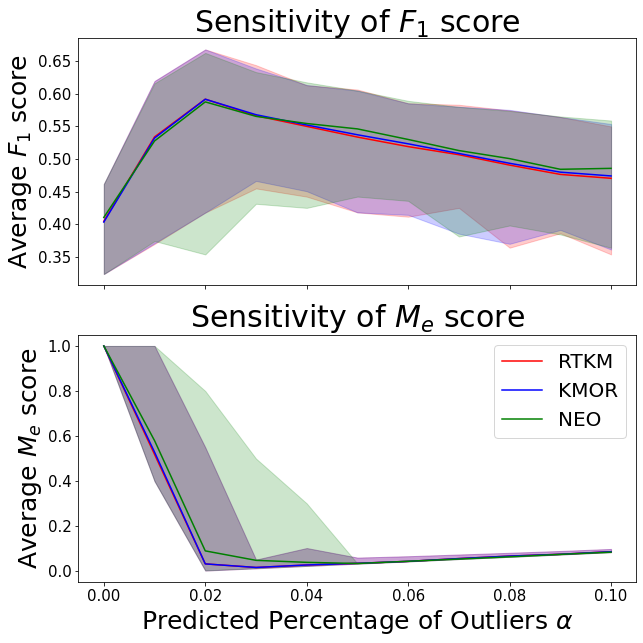

In [20]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (10,10))
ax1.plot(alpha_vals, f1_avg_rtkm, label = 'RTKM', c = 'r')
ax1.plot(alpha_vals, f1_avg_kmor, label = 'KMOR', c = 'b')
ax1.plot(alpha_vals, f1_avg_neo, label = 'NEO', c = 'g')
ax1.fill_between(alpha_vals, min_rtkm[0,:], max_rtkm[0,:], color = 'r', alpha = 0.2)
ax1.fill_between(alpha_vals, min_kmor[0,:], max_kmor[0,:], color = 'b', alpha = 0.2)
ax1.fill_between(alpha_vals, min_neo[0,:], max_neo[0,:], color = 'g', alpha = 0.2)
ax1.set_title('Sensitivity of $F_1$ score')
ax1.set_ylabel('Average $F_1$ score')
ax1.yaxis.label.set_fontsize(25)
ax1.title.set_fontsize(30)
ax1.tick_params(axis='y', labelsize=15)
# ax1.legend()

ax2.plot(alpha_vals, me_avg_rtkm, label = 'RTKM', c = 'r')
ax2.plot(alpha_vals, me_avg_kmor, label = 'KMOR', c = 'b')
ax2.plot(alpha_vals, me_avg_neo, label = 'NEO', c = 'g')
ax2.fill_between(alpha_vals, min_rtkm[1,:], max_rtkm[1,:], color = 'r', alpha = 0.2)
ax2.fill_between(alpha_vals, min_kmor[1,:], max_kmor[1,:], color = 'b', alpha = 0.2)
ax2.fill_between(alpha_vals, min_neo[1,:], max_neo[1,:], color = 'g', alpha = 0.2)
ax2.set_title('Sensitivity of $M_e$ score')
ax2.set_ylabel('Average $M_e$ score')
ax2.set_xlabel('Predicted Percentage of Outliers ' r'$\alpha$')
ax2.xaxis.label.set_fontsize(25)
ax2.yaxis.label.set_fontsize(25)
ax2.title.set_fontsize(30)
ax2.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.legend(fontsize = 20)

plt.savefig('scenewoutliers3', format='pdf')

In [21]:
# np.save('scene_out_3', data)
# np.save('scene_true_out_3', true_out)
# np.save('scene_out_labels_3', labels)